# credit_risk_customers Project
### Predict if customers are risky or not for credit



##### About this file
##### This dataset classifies people described by a set of attributes as good or bad credit risks.

* checking_status - Status of existing checking account
* duration - Duration in months
* credit_history - credits taken, paid back duly, delays, critical accounts
* purpose - Purpose of the credit
* credit_amount - Amount of credit
* savings_status - Status of savings account/bond
* employment - Present employment, in number of years
* installment_commitment - Installment rate in percentage of disposable income
* personal_status - sex and marital data
* other_parties - Other debtors / guarantors
* residence_since
* property_magnitude
* age
* other_payment_plans
* housing
* existing_credits
* job
* num_dependents
* own_telephone
* foreign_worker
* class


## 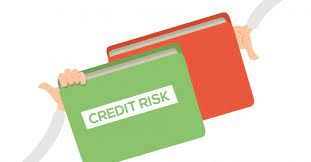

##### 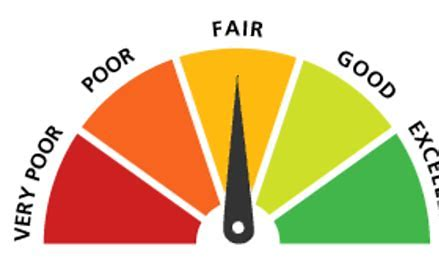

In [2]:
## Importing the Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
## Importing Data using Pandas
data=pd.read_csv('credit_customers.csv',encoding_errors='ignore')

In [4]:
## Taking out starting 5 entries

data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [5]:
## Finding the shape of the Data

print('The shape of data is',data.shape)

The shape of data is (1000, 21)


#### There are 1000 rows and 21 columns

In [6]:
## Fetching the name of the columns

data.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [7]:
## Finding the Data Types

data.dtypes

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object

### We found inconsistency in the data

* The Data Type of Duration should be integer
* The Data Type of Age should be integer
* The Data Type of Residence_since should be object
* The Data Type of Existing_Credits should be object
* The Data Type of Num_Dependents should be object
* The Data Type of Installment_commitment should be object





In [8]:
## Changing the Data Types to manage Inconsistency in Data Types


data['duration'] = data['duration'].astype('int64')
data['age'] = data['age'].astype('int64')
data['residence_since'] = data['residence_since'].astype('object')
data['existing_credits'] = data['existing_credits'].astype('object')
data['num_dependents'] = data['num_dependents'].astype('object')
data['installment_commitment'] = data['installment_commitment'].astype('object')

In [9]:
data.dtypes

checking_status            object
duration                    int64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment     object
personal_status            object
other_parties              object
residence_since            object
property_magnitude         object
age                         int64
other_payment_plans        object
housing                    object
existing_credits           object
job                        object
num_dependents             object
own_telephone              object
foreign_worker             object
class                      object
dtype: object

#### We have removed the inconsistency in the Data 

In [10]:
## data.dtypes

In [11]:
## Checking the Null Values

data.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

#### There are No Null Values in the Dataset

In [12]:
## Printing the Data Types of every column

for i in data.columns:
    print("The data type of {} is {} ".format(i,data[i].dtypes))

The data type of checking_status is object 
The data type of duration is int64 
The data type of credit_history is object 
The data type of purpose is object 
The data type of credit_amount is float64 
The data type of savings_status is object 
The data type of employment is object 
The data type of installment_commitment is object 
The data type of personal_status is object 
The data type of other_parties is object 
The data type of residence_since is object 
The data type of property_magnitude is object 
The data type of age is int64 
The data type of other_payment_plans is object 
The data type of housing is object 
The data type of existing_credits is object 
The data type of job is object 
The data type of num_dependents is object 
The data type of own_telephone is object 
The data type of foreign_worker is object 
The data type of class is object 


In [13]:
## Top categories

for i in data.columns:
    print("*"*50)
    print("The datatype for {} is {}".format(i,data[i].dtypes))
    if data[i].dtypes==object:
        print('Top categories for {} are'.format(i))
        print(data[i].value_counts().sort_values(ascending=False).head())

**************************************************
The datatype for checking_status is object
Top categories for checking_status are
no checking    394
<0             274
0<=X<200       269
>=200           63
Name: checking_status, dtype: int64
**************************************************
The datatype for duration is int64
**************************************************
The datatype for credit_history is object
Top categories for credit_history are
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: credit_history, dtype: int64
**************************************************
The datatype for purpose is object
Top categories for purpose are
radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
Name: purpose, dtype: int64
*********************************

In [14]:
## Bottom categories

for i in data.columns:
    print('*' * 50)
    print("The datatype for {} is {}".format(i,data[i].dtypes))
    if data[i].dtypes==object:
        print("Bottom categories for {} are".format(i))
        print(data[i].value_counts().sort_values(ascending=True).head(10))
        print('*'* 50)

**************************************************
The datatype for checking_status is object
Bottom categories for checking_status are
>=200           63
0<=X<200       269
<0             274
no checking    394
Name: checking_status, dtype: int64
**************************************************
**************************************************
The datatype for duration is int64
**************************************************
The datatype for credit_history is object
Bottom categories for credit_history are
no credits/all paid                40
all paid                           49
delayed previously                 88
critical/other existing credit    293
existing paid                     530
Name: credit_history, dtype: int64
**************************************************
**************************************************
The datatype for purpose is object
Bottom categories for purpose are
retraining               9
domestic appliance      12
other                   12
repa

In [15]:
## Making a list of categorical Data

categorical_data=[]

In [16]:
for i in data.columns:
    if data[i].dtype == object:
        categorical_data.append(i)

In [17]:
categorical_data

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'installment_commitment',
 'personal_status',
 'other_parties',
 'residence_since',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'num_dependents',
 'own_telephone',
 'foreign_worker',
 'class']

**************************************************
Top 10 categories for checking_status are
no checking    394
<0             274
0<=X<200       269
>=200           63
Name: checking_status, dtype: int64


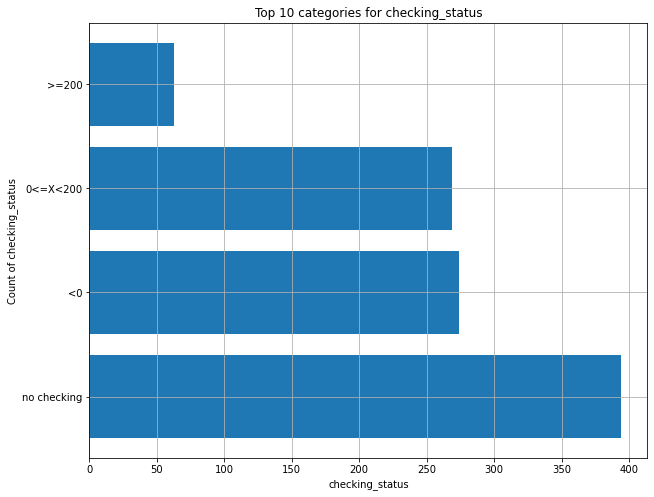

**************************************************
**************************************************
Top 10 categories for credit_history are
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: credit_history, dtype: int64


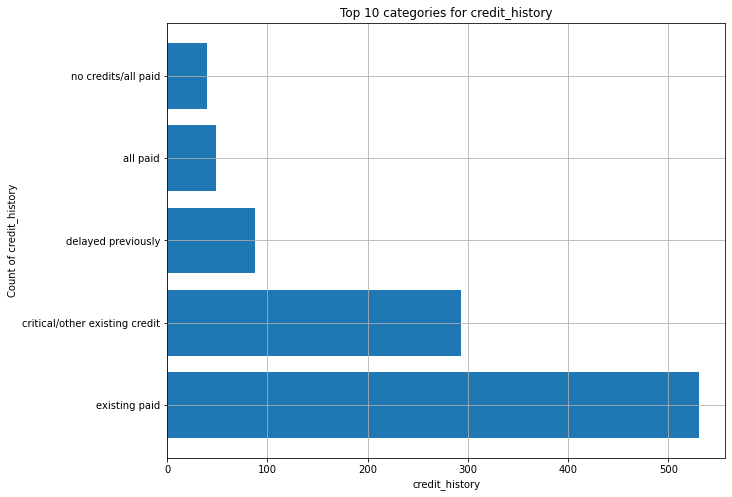

**************************************************
**************************************************
Top 10 categories for purpose are
radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: purpose, dtype: int64


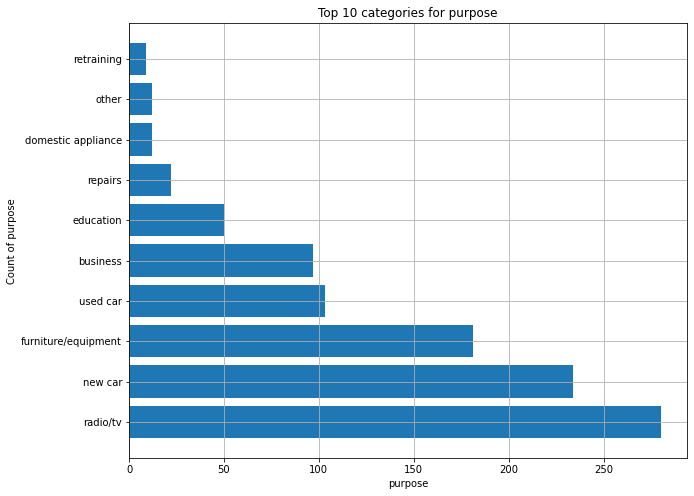

**************************************************
**************************************************
Top 10 categories for savings_status are
<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: savings_status, dtype: int64


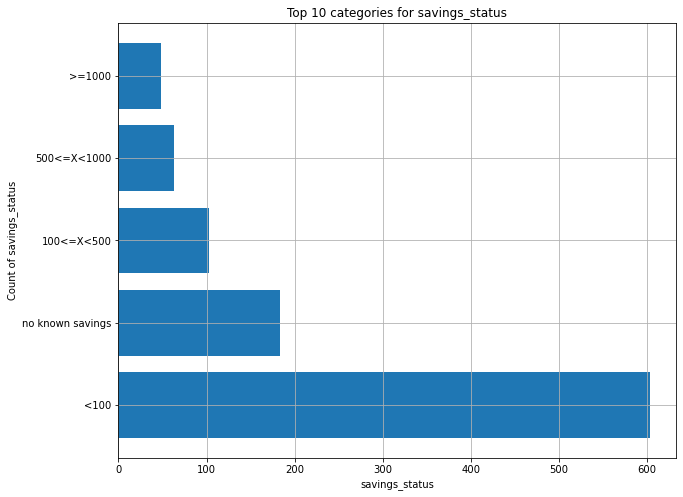

**************************************************
**************************************************
Top 10 categories for employment are
1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: employment, dtype: int64


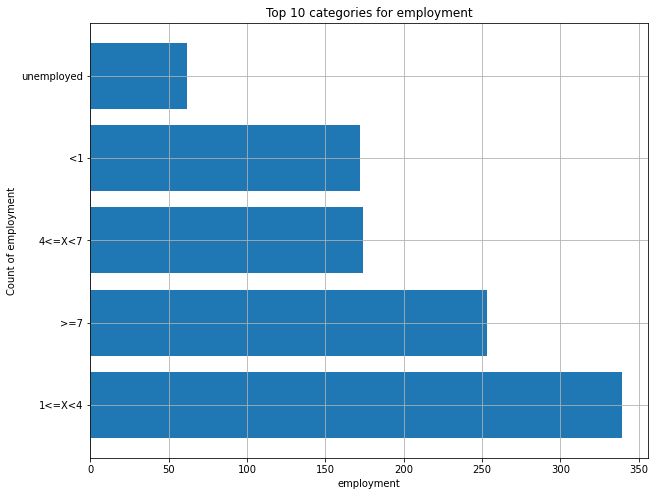

**************************************************
**************************************************
Top 10 categories for installment_commitment are
4.0    476
2.0    231
3.0    157
1.0    136
Name: installment_commitment, dtype: int64


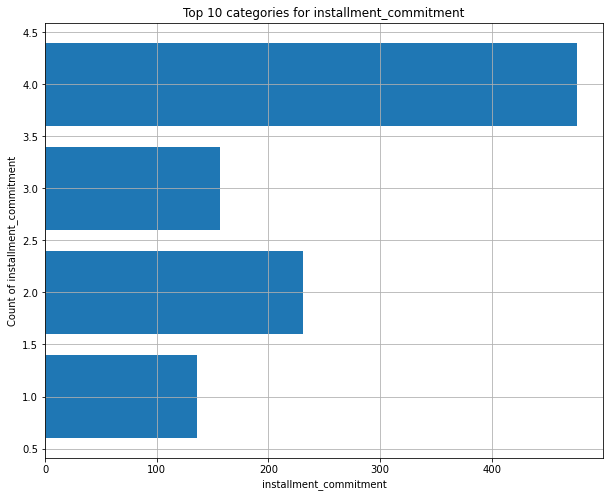

**************************************************
**************************************************
Top 10 categories for personal_status are
male single           548
female div/dep/mar    310
male mar/wid           92
male div/sep           50
Name: personal_status, dtype: int64


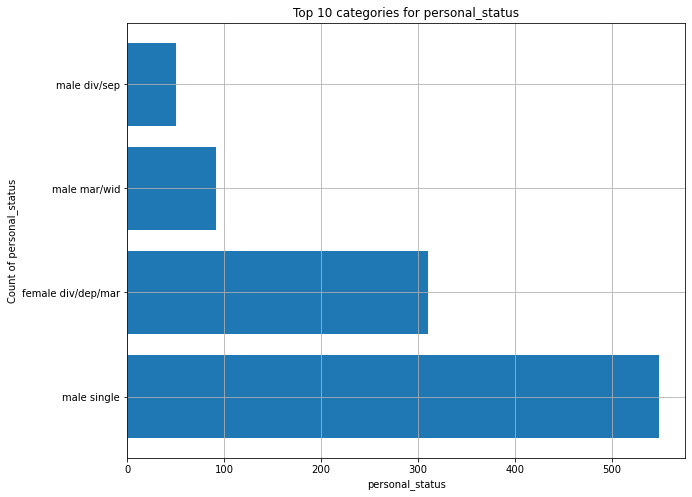

**************************************************
**************************************************
Top 10 categories for other_parties are
none            907
guarantor        52
co applicant     41
Name: other_parties, dtype: int64


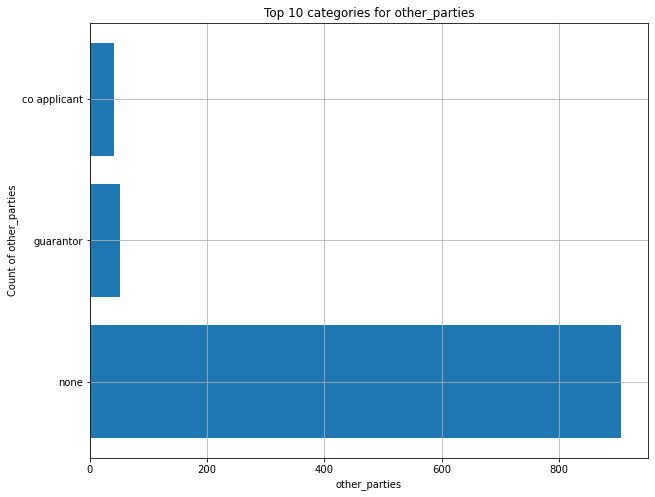

**************************************************
**************************************************
Top 10 categories for residence_since are
4.0    413
2.0    308
3.0    149
1.0    130
Name: residence_since, dtype: int64


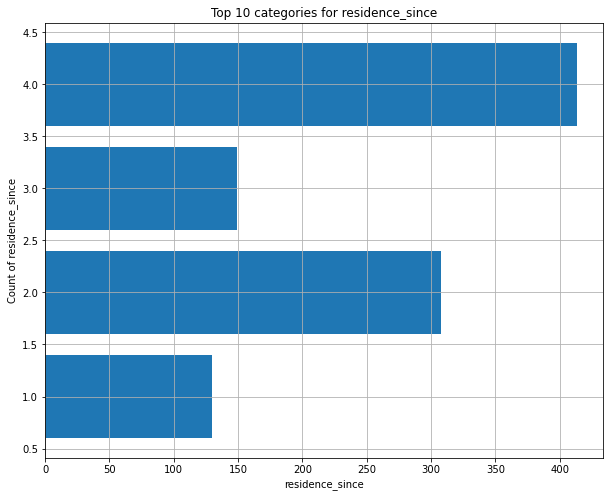

**************************************************
**************************************************
Top 10 categories for property_magnitude are
car                  332
real estate          282
life insurance       232
no known property    154
Name: property_magnitude, dtype: int64


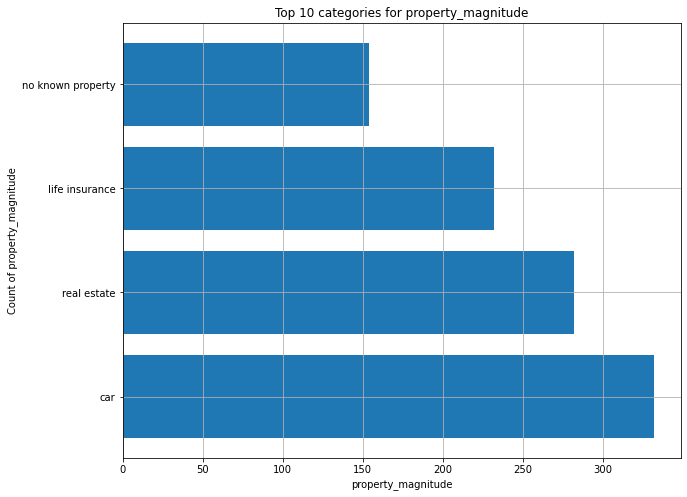

**************************************************
**************************************************
Top 10 categories for other_payment_plans are
none      814
bank      139
stores     47
Name: other_payment_plans, dtype: int64


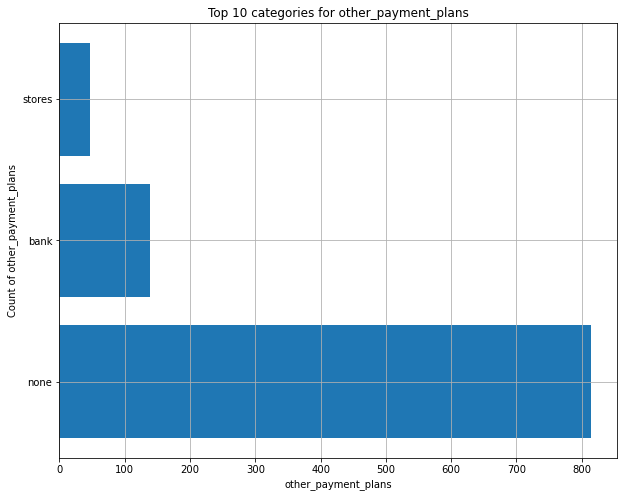

**************************************************
**************************************************
Top 10 categories for housing are
own         713
rent        179
for free    108
Name: housing, dtype: int64


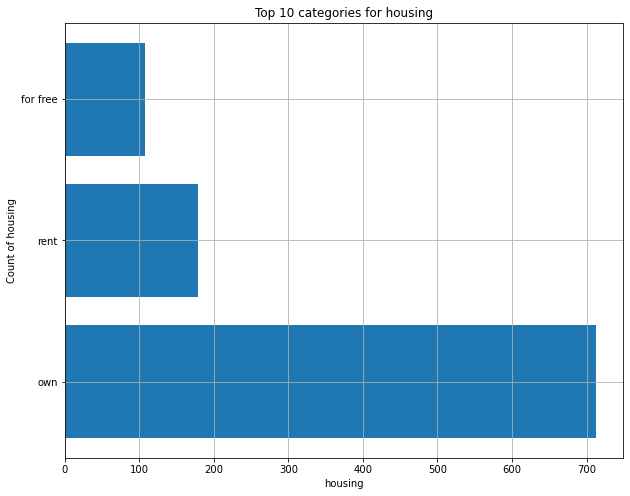

**************************************************
**************************************************
Top 10 categories for existing_credits are
1.0    633
2.0    333
3.0     28
4.0      6
Name: existing_credits, dtype: int64


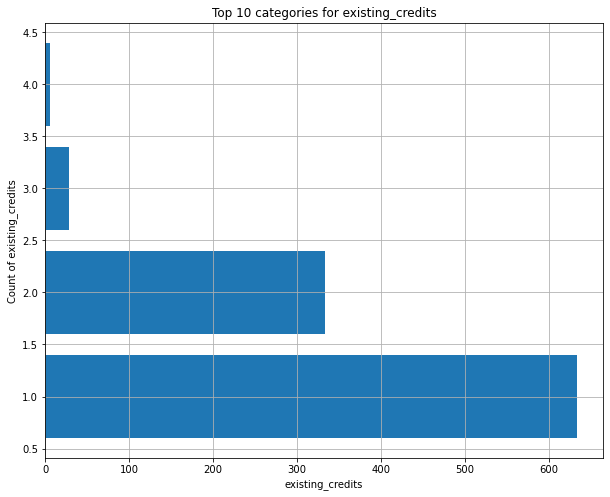

**************************************************
**************************************************
Top 10 categories for job are
skilled                      630
unskilled resident           200
high qualif/self emp/mgmt    148
unemp/unskilled non res       22
Name: job, dtype: int64


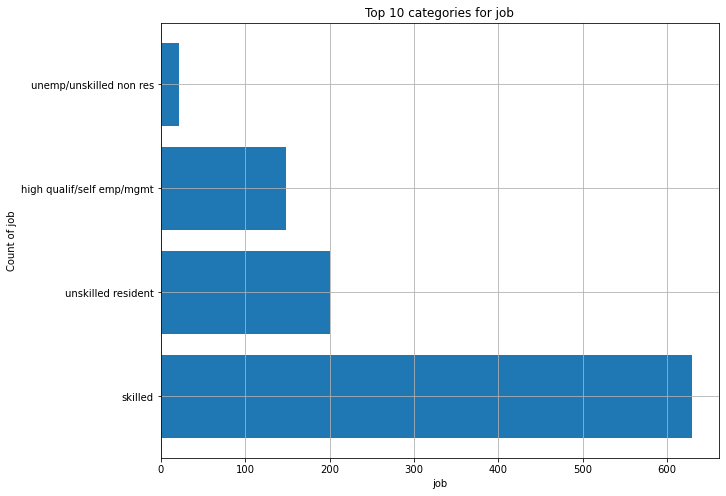

**************************************************
**************************************************
Top 10 categories for num_dependents are
1.0    845
2.0    155
Name: num_dependents, dtype: int64


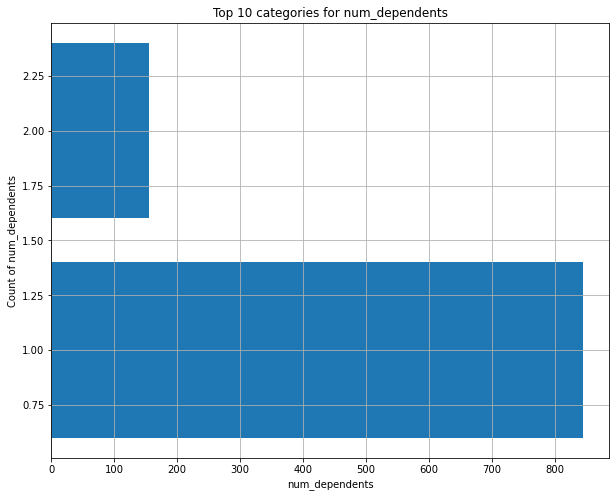

**************************************************
**************************************************
Top 10 categories for own_telephone are
none    596
yes     404
Name: own_telephone, dtype: int64


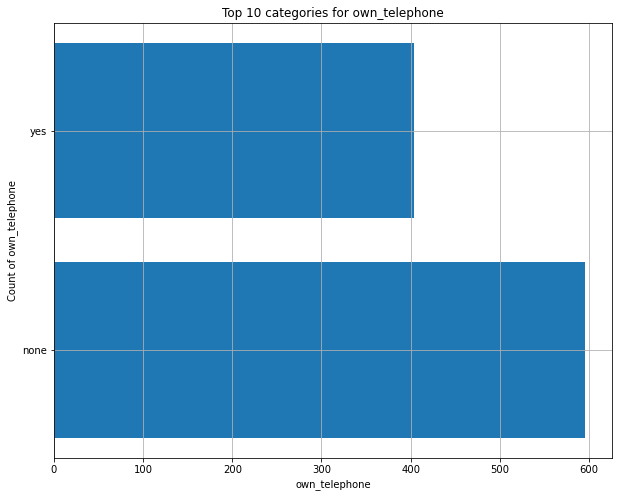

**************************************************
**************************************************
Top 10 categories for foreign_worker are
yes    963
no      37
Name: foreign_worker, dtype: int64


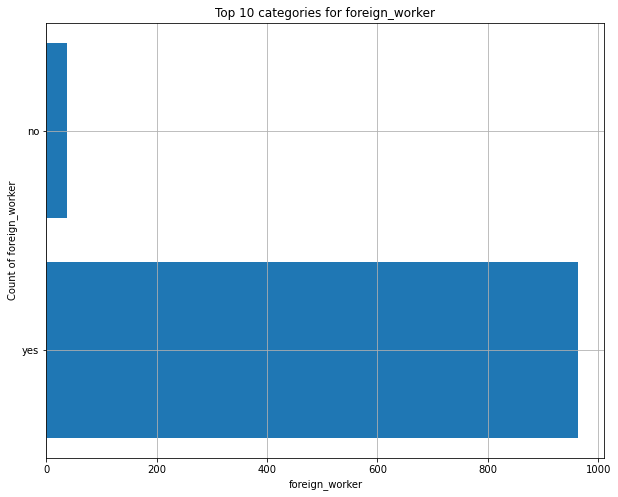

**************************************************
**************************************************
Top 10 categories for class are
good    700
bad     300
Name: class, dtype: int64


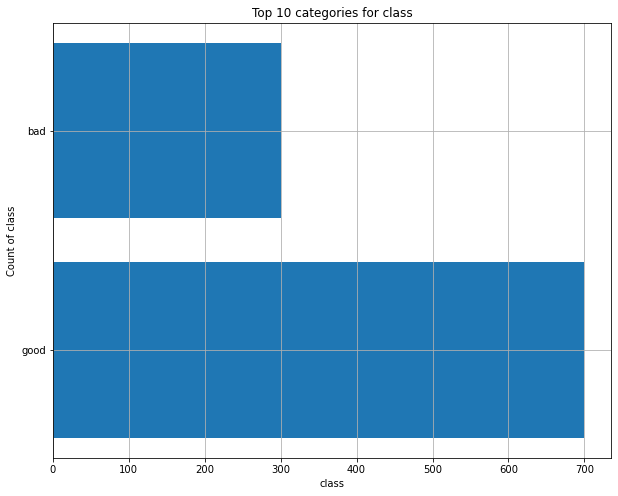

**************************************************


In [18]:
## Analyzing the Data using Horizontal Bar Chart

for i in categorical_data:
    print("*" * 50)
    print('Top 10 categories for {} are'.format(i))
    print(data[i].value_counts().sort_values(ascending=False).head(10))
    index = data[i].value_counts().sort_values(ascending=False).head(10).index
    values = data[i].value_counts().sort_values(ascending=False).head(10).values
    plt.figure(figsize = [10,8])
    plt.barh(index,values)
    plt.xlabel(i)
    plt.ylabel('Count of {}'.format(i))
    plt.title('Top 10 categories for {}'.format(i))
    plt.grid()
    plt.show()
    print("*" * 50)

Top categories for checking_status is 
no checking    394
<0             274
0<=X<200       269
>=200           63
Name: checking_status, dtype: int64


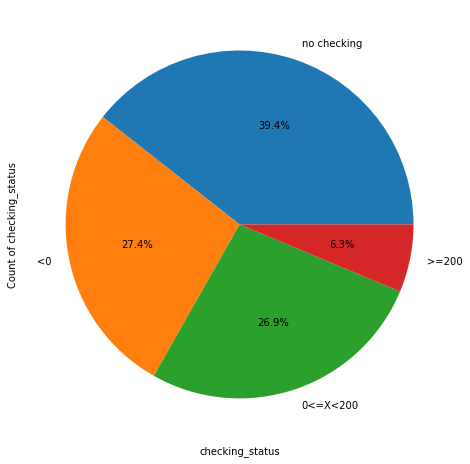

**************************************************
Top categories for credit_history is 
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: credit_history, dtype: int64


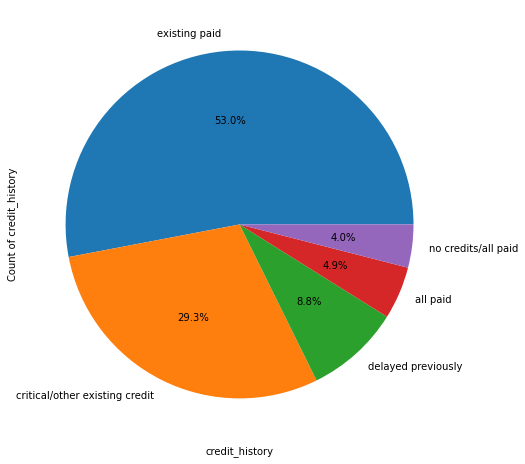

**************************************************
Top categories for purpose is 
radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: purpose, dtype: int64


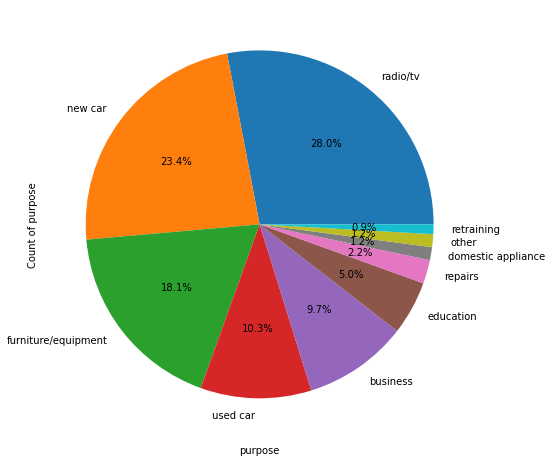

**************************************************
Top categories for savings_status is 
<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: savings_status, dtype: int64


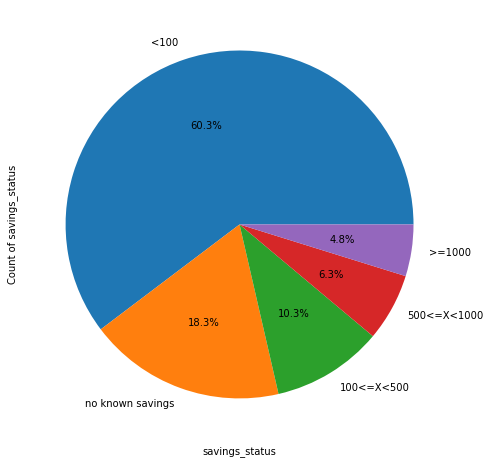

**************************************************
Top categories for employment is 
1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: employment, dtype: int64


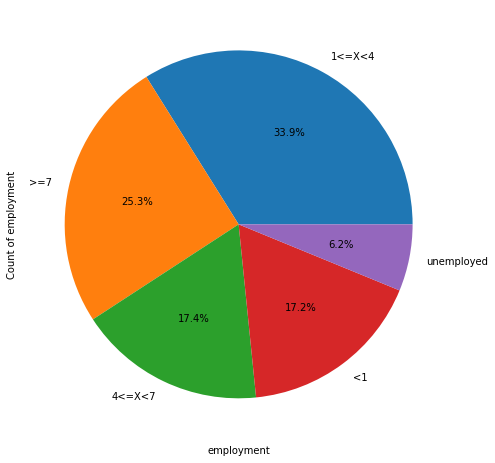

**************************************************
Top categories for installment_commitment is 
4.0    476
2.0    231
3.0    157
1.0    136
Name: installment_commitment, dtype: int64


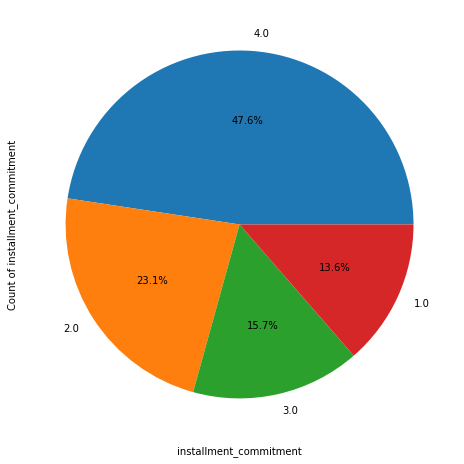

**************************************************
Top categories for personal_status is 
male single           548
female div/dep/mar    310
male mar/wid           92
male div/sep           50
Name: personal_status, dtype: int64


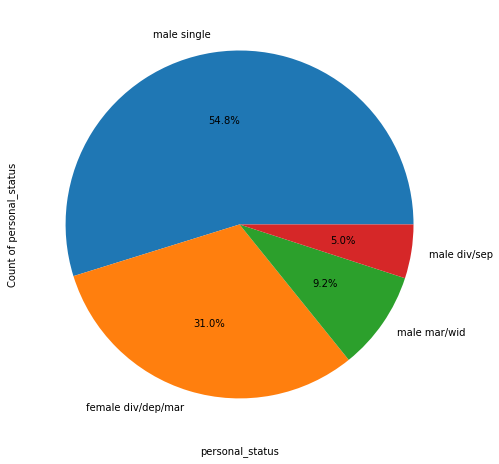

**************************************************
Top categories for other_parties is 
none            907
guarantor        52
co applicant     41
Name: other_parties, dtype: int64


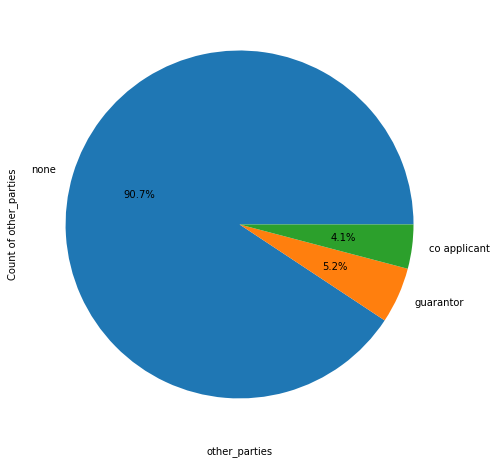

**************************************************
Top categories for residence_since is 
4.0    413
2.0    308
3.0    149
1.0    130
Name: residence_since, dtype: int64


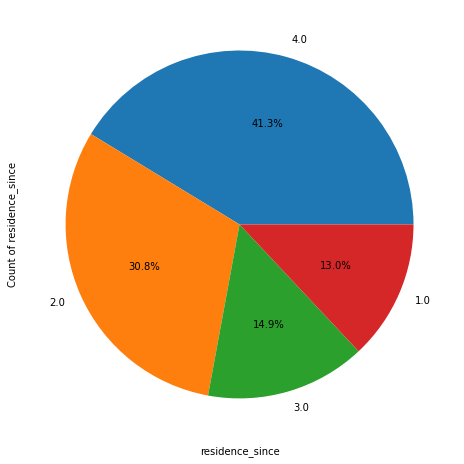

**************************************************
Top categories for property_magnitude is 
car                  332
real estate          282
life insurance       232
no known property    154
Name: property_magnitude, dtype: int64


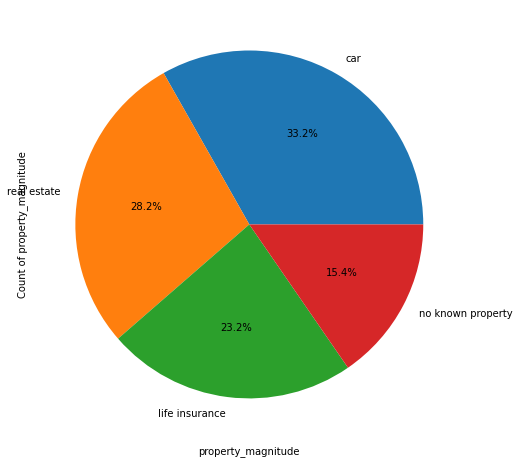

**************************************************
Top categories for other_payment_plans is 
none      814
bank      139
stores     47
Name: other_payment_plans, dtype: int64


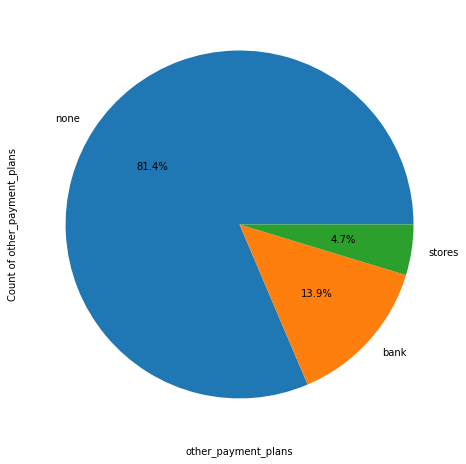

**************************************************
Top categories for housing is 
own         713
rent        179
for free    108
Name: housing, dtype: int64


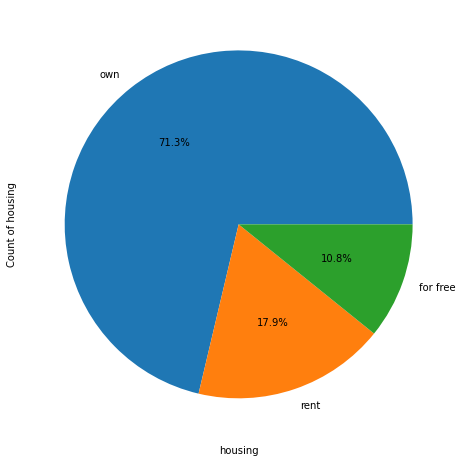

**************************************************
Top categories for existing_credits is 
1.0    633
2.0    333
3.0     28
4.0      6
Name: existing_credits, dtype: int64


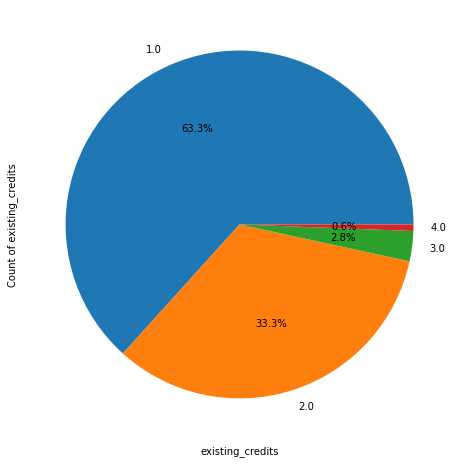

**************************************************
Top categories for job is 
skilled                      630
unskilled resident           200
high qualif/self emp/mgmt    148
unemp/unskilled non res       22
Name: job, dtype: int64


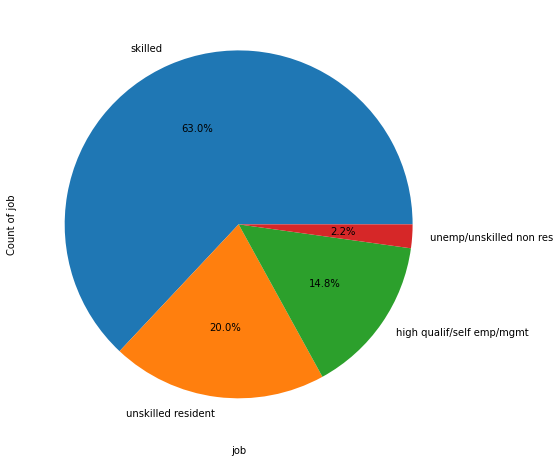

**************************************************
Top categories for num_dependents is 
1.0    845
2.0    155
Name: num_dependents, dtype: int64


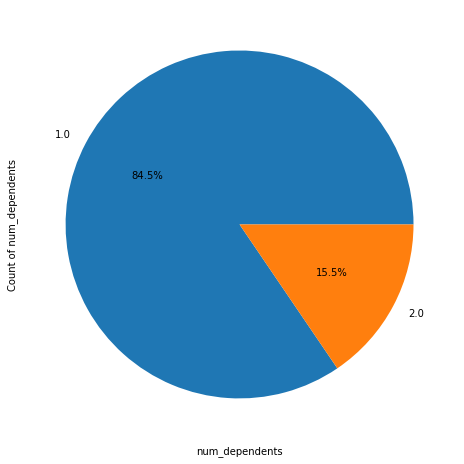

**************************************************
Top categories for own_telephone is 
none    596
yes     404
Name: own_telephone, dtype: int64


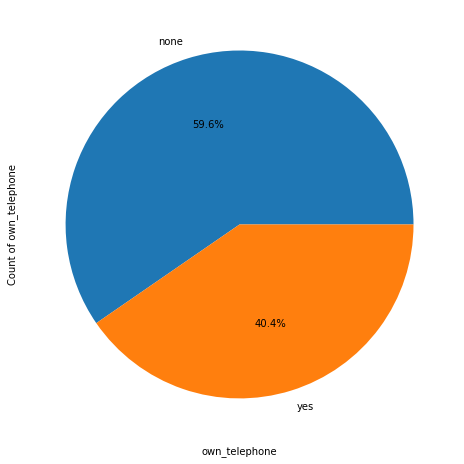

**************************************************
Top categories for foreign_worker is 
yes    963
no      37
Name: foreign_worker, dtype: int64


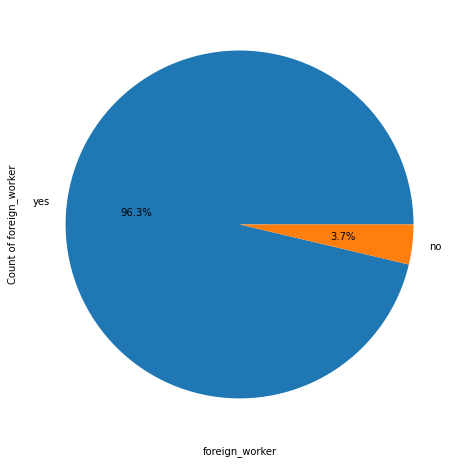

**************************************************
Top categories for class is 
good    700
bad     300
Name: class, dtype: int64


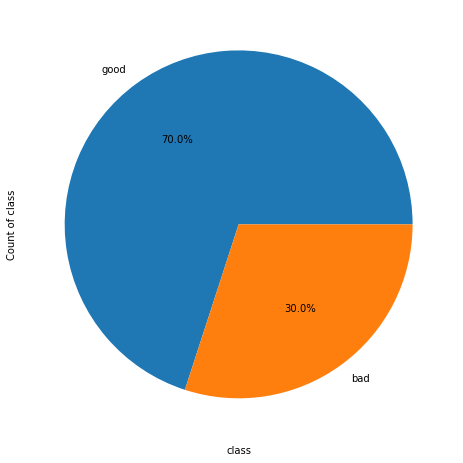

**************************************************


In [19]:
## Analyzing the Data using Pie Charts

for i in categorical_data:
    print("Top categories for {} is ".format(i))
    print(data[i].value_counts().sort_values(ascending=False).head(10))
    index = data[i].value_counts().sort_values(ascending=False).index
    values = data[i].value_counts().sort_values(ascending=False).values
    plt.figure(figsize=[10,8])
    plt.pie(values,labels=index,autopct='%.1f%%')
    plt.xlabel(i)
    plt.ylabel("Count of {}".format(i))
    plt.grid()
    plt.show()
    print("*"*50)
    

Top categories for checking_status
no checking    394
<0             274
0<=X<200       269
>=200           63
Name: checking_status, dtype: int64


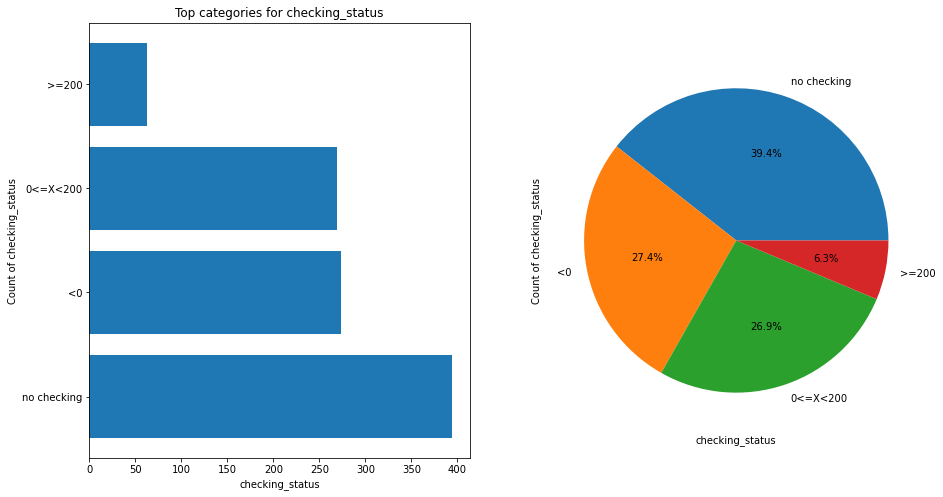

**************************************************
Top categories for credit_history
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: credit_history, dtype: int64


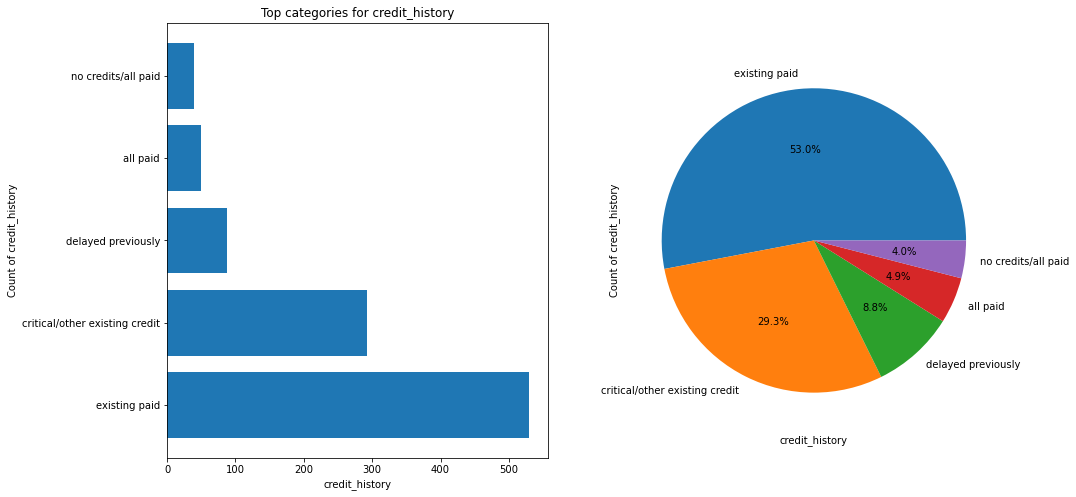

**************************************************
Top categories for purpose
radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: purpose, dtype: int64


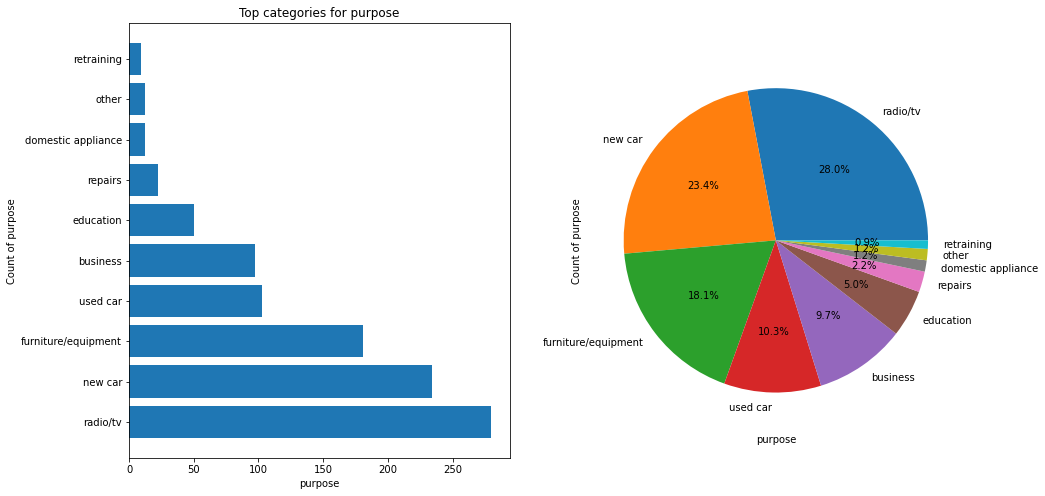

**************************************************
Top categories for savings_status
<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: savings_status, dtype: int64


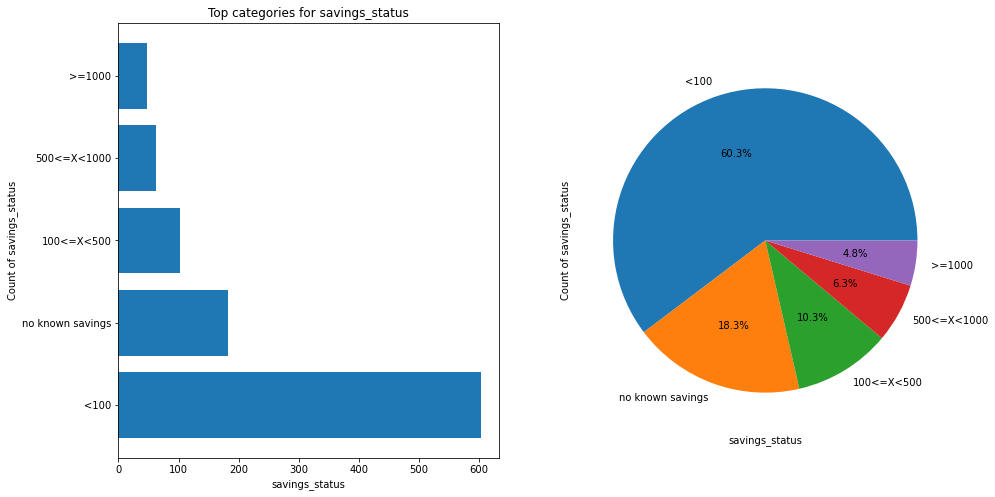

**************************************************
Top categories for employment
1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: employment, dtype: int64


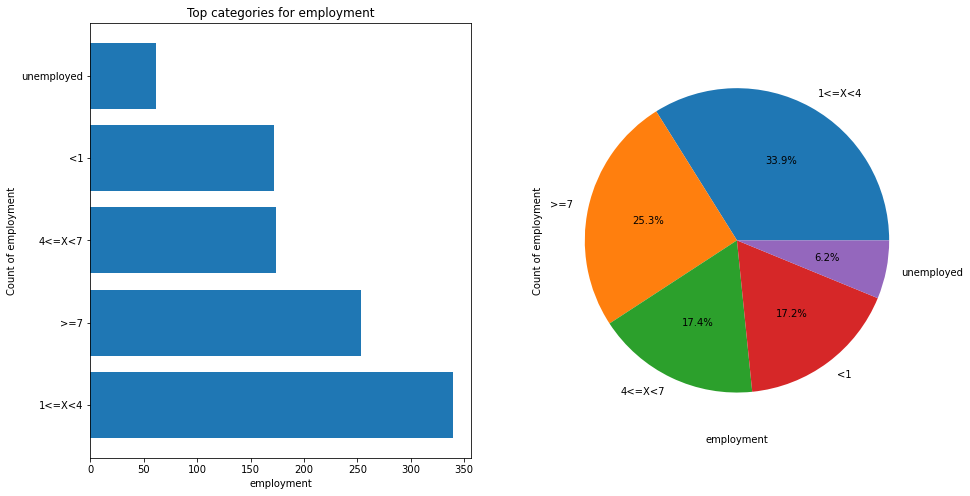

**************************************************
Top categories for installment_commitment
4.0    476
2.0    231
3.0    157
1.0    136
Name: installment_commitment, dtype: int64


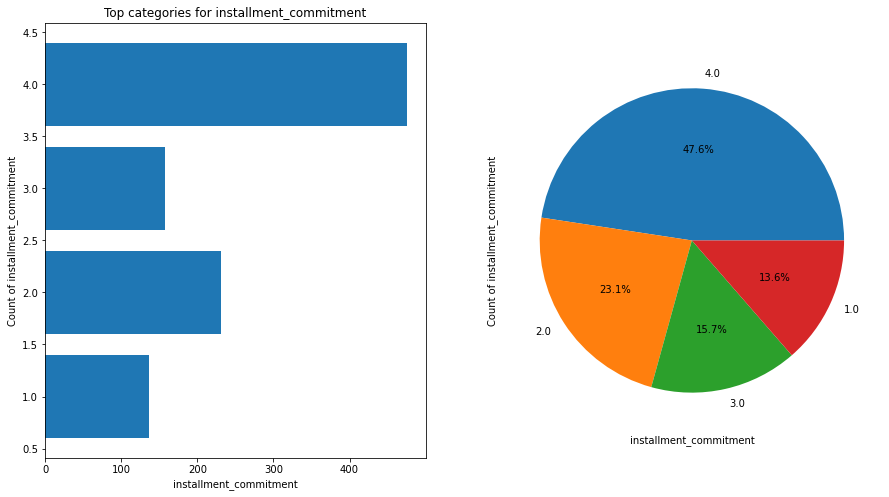

**************************************************
Top categories for personal_status
male single           548
female div/dep/mar    310
male mar/wid           92
male div/sep           50
Name: personal_status, dtype: int64


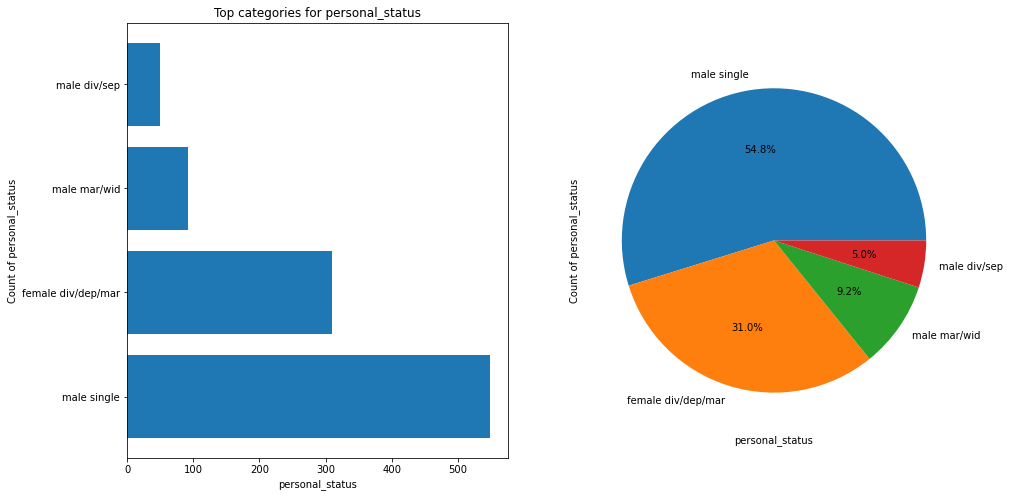

**************************************************
Top categories for other_parties
none            907
guarantor        52
co applicant     41
Name: other_parties, dtype: int64


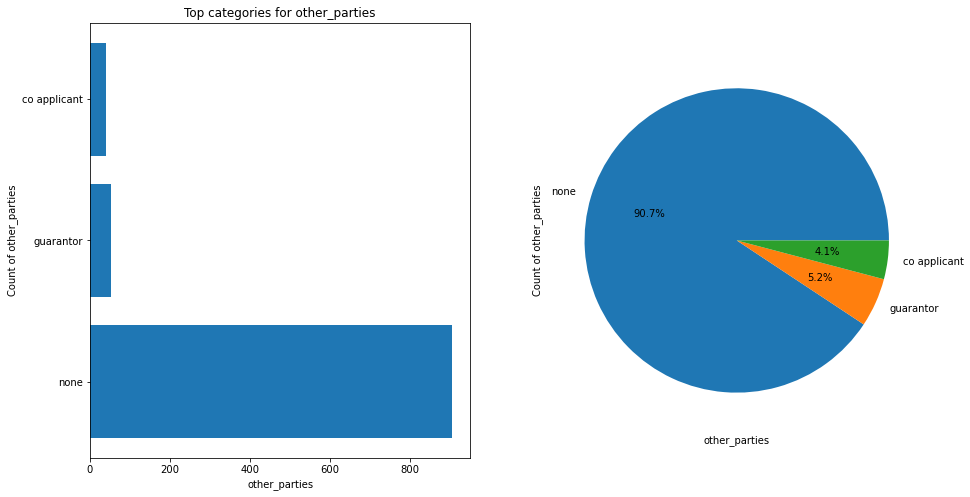

**************************************************
Top categories for residence_since
4.0    413
2.0    308
3.0    149
1.0    130
Name: residence_since, dtype: int64


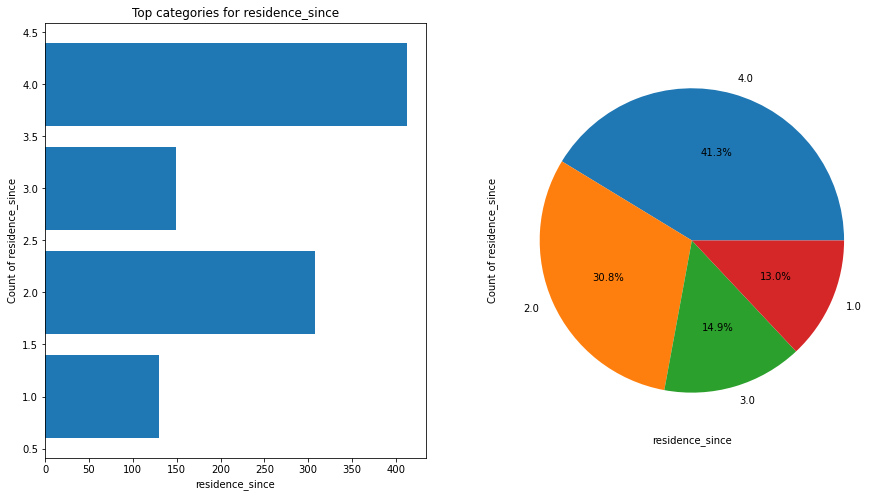

**************************************************
Top categories for property_magnitude
car                  332
real estate          282
life insurance       232
no known property    154
Name: property_magnitude, dtype: int64


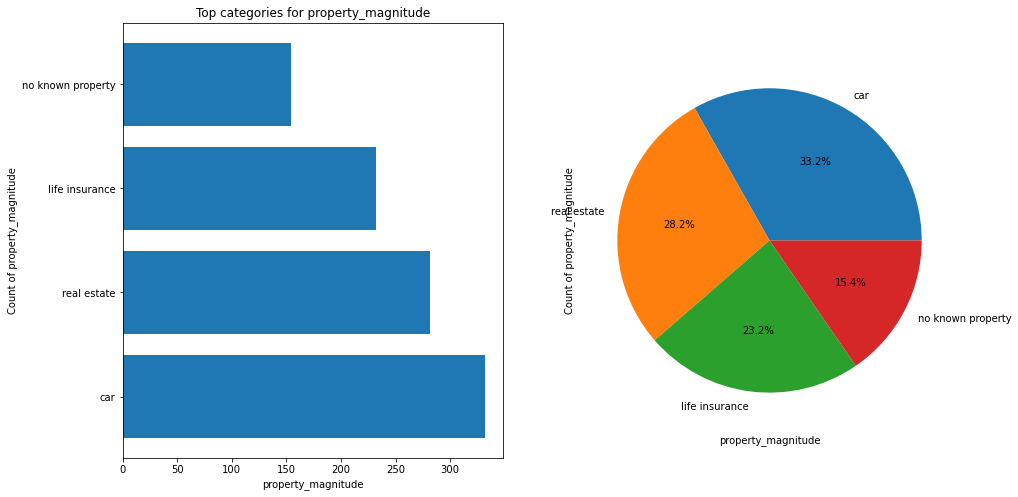

**************************************************
Top categories for other_payment_plans
none      814
bank      139
stores     47
Name: other_payment_plans, dtype: int64


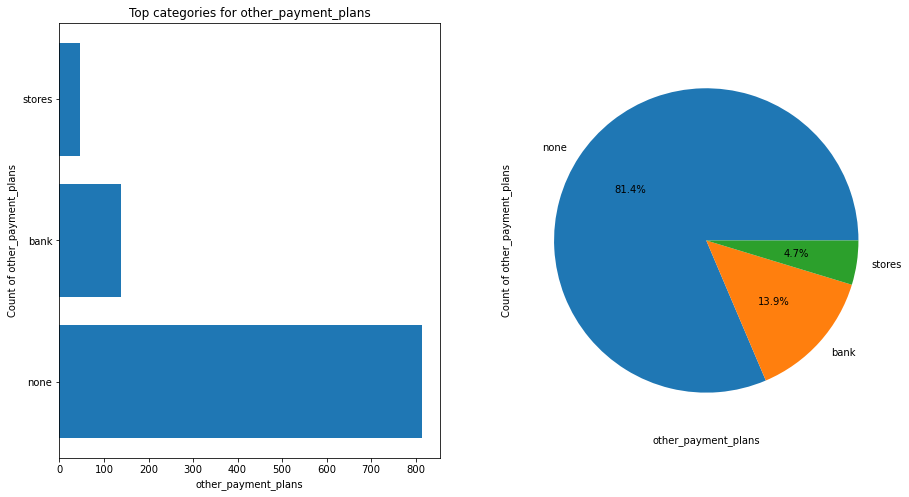

**************************************************
Top categories for housing
own         713
rent        179
for free    108
Name: housing, dtype: int64


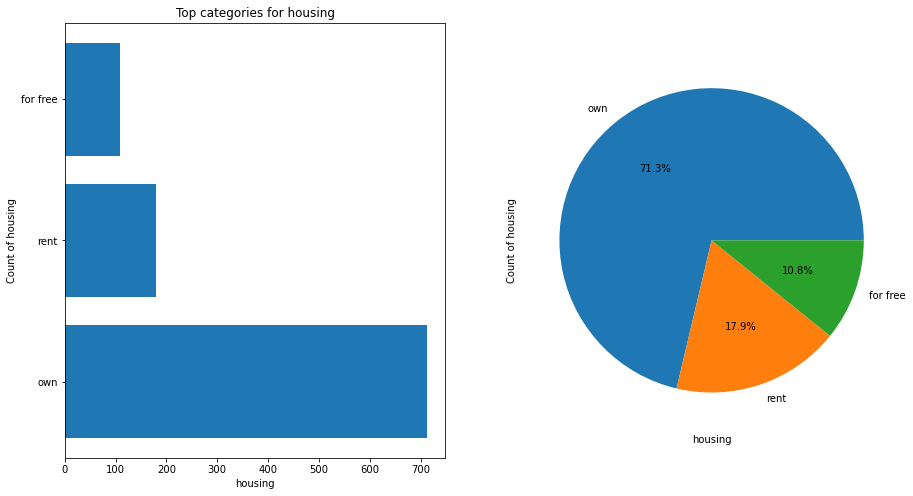

**************************************************
Top categories for existing_credits
1.0    633
2.0    333
3.0     28
4.0      6
Name: existing_credits, dtype: int64


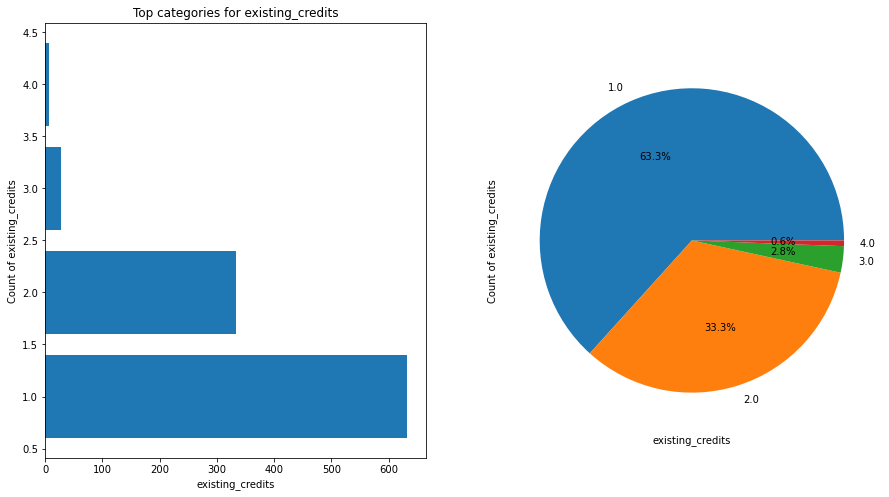

**************************************************
Top categories for job
skilled                      630
unskilled resident           200
high qualif/self emp/mgmt    148
unemp/unskilled non res       22
Name: job, dtype: int64


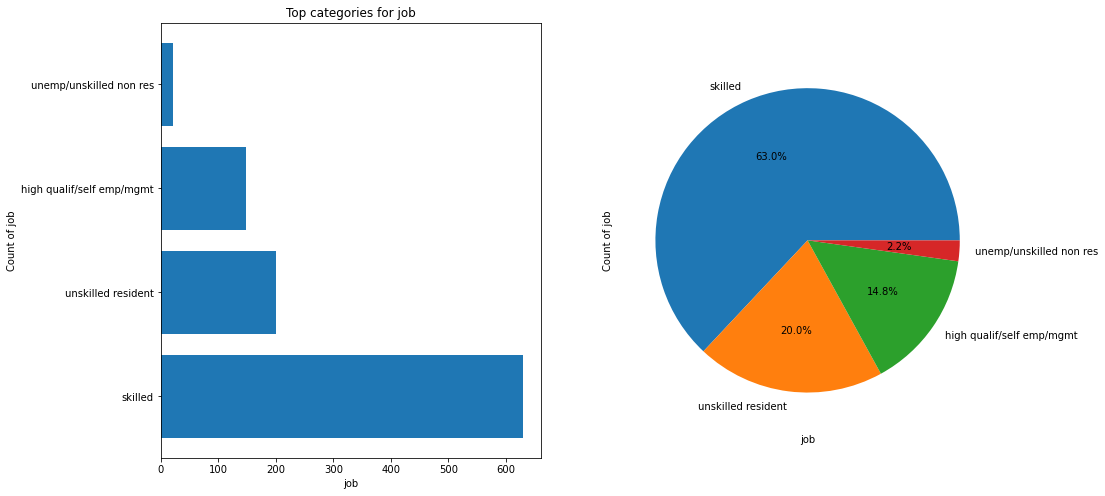

**************************************************
Top categories for num_dependents
1.0    845
2.0    155
Name: num_dependents, dtype: int64


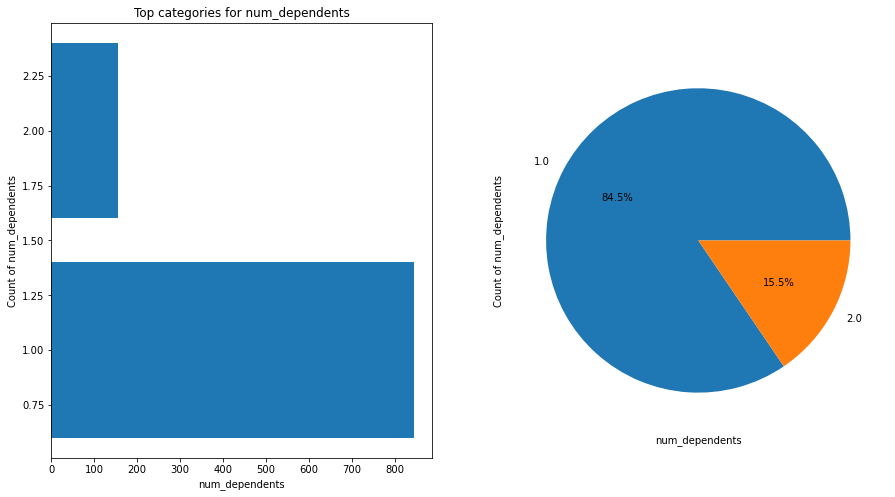

**************************************************
Top categories for own_telephone
none    596
yes     404
Name: own_telephone, dtype: int64


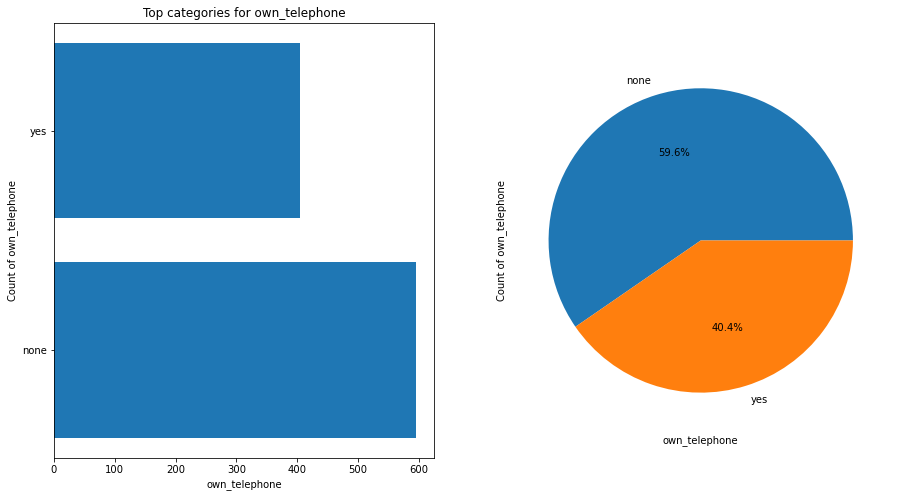

**************************************************
Top categories for foreign_worker
yes    963
no      37
Name: foreign_worker, dtype: int64


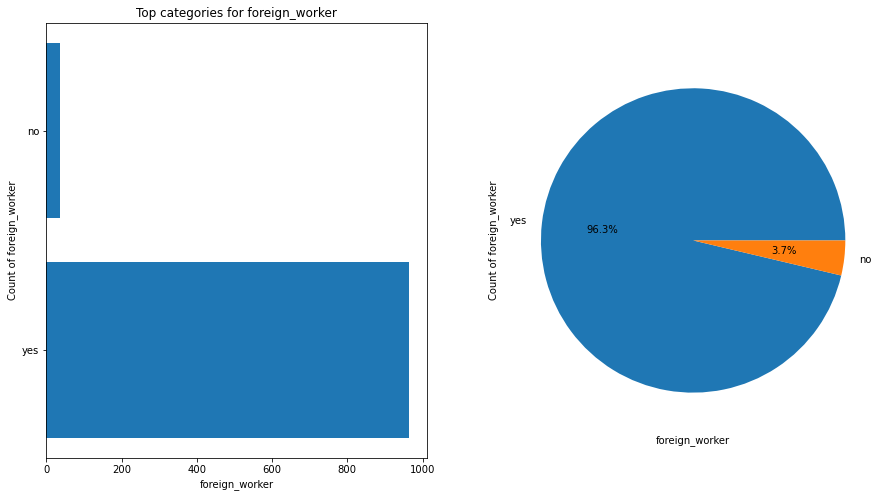

**************************************************
Top categories for class
good    700
bad     300
Name: class, dtype: int64


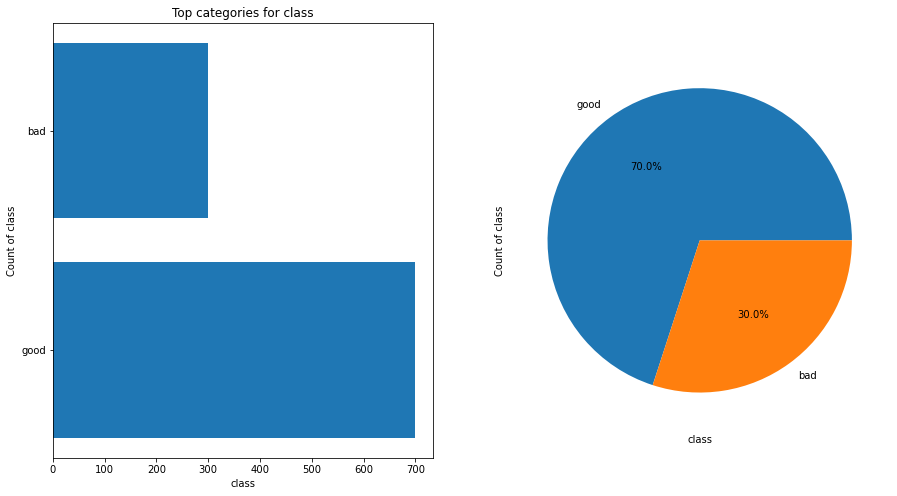

**************************************************


In [20]:
### Making Perfect View For Analysis

for i in categorical_data:
    print('Top categories for {}'.format(i))
    print(data[i].value_counts().sort_values(ascending=False).head(10))
    index = data[i].value_counts().sort_values(ascending=False).head(10).index
    values = data[i].value_counts().sort_values(ascending=False).head(10).values
    plt.figure(figsize=[15,8])
    plt.subplot(1,2,1)
    plt.barh(index,values)
    plt.xlabel(i)
    plt.ylabel('Count of {}'.format(i))
    plt.title('Top categories for {}'.format(i))
    plt.subplot(1,2,2)
    plt.pie(values,labels=index,autopct='%.1f%%')
    plt.xlabel(i)
    plt.ylabel("Count of {}".format(i))
    plt.grid()
    plt.savefig("Top_categories_for_{}.png".format(i))
    plt.show()
    print("*"*50)
    

* Almost 40% people have checking_status as no checking, which means there will be no account checking for them if they are   availing for credit. 27.5% people have less than 0 in their account checking. 27% have between 0 to 200 and only 6% people heve more than 200 in their account checking.

* People who are existing paid or critical/another existing credit are more prone towards credit.

* People are taking more credit for purchasing Radio,TV,New Car,Furnitures and equipments.

* Customers who have less savings are more prone towards credit as they dont have liquidity.

* Customers who have more tenure of employment are more prone towards credit which shows they need more money.

* Almost 50% customers have installment commitment of 4

* Male single are in need of more credit which is surprising as bachelor male have less expenses.

* In more than 90% cases there is no involvement of other parties in loan cases.

* Customers who have more tenure of residence are more prone towards credit.

* Customers who are in possession of Car and Real Estate are more prone towards credit

* Customers who are owning house are more inclined towards credit

* Maximum customers are having only one existing loan credit

* 70% customers have good credit and 30% have bad credit

In [21]:
## Making a list of numerical data

numerical_columns=[]
for i in data.columns:
    if data[i].dtypes!=object:
        numerical_columns.append(i)
        
        

In [22]:
numerical_columns

['duration', 'credit_amount', 'age']

In [23]:
## Finding the skewness of data

data.skew()

C:\Users\sneha\AppData\Local\Temp\ipykernel_18428\4215762480.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


duration                  1.094184
credit_amount             1.949628
installment_commitment   -0.531348
residence_since          -0.272570
age                       1.020739
existing_credits          1.272576
num_dependents            1.909445
dtype: float64

#### Duration, Credit_Amount,Age,Existing_credits,Num_dependents are positively skewed while Installment_commitment and Residence_Since are negatively skewed

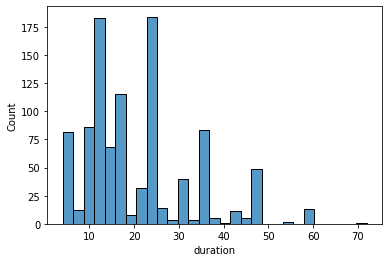

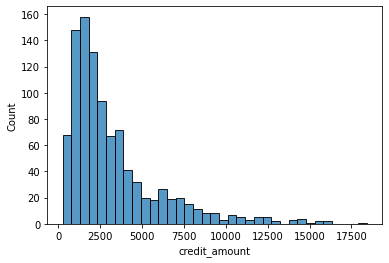

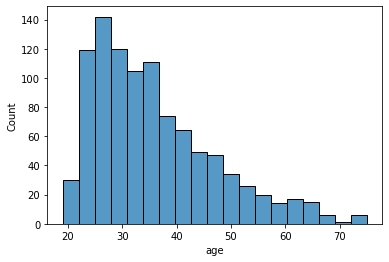

In [24]:
## Analyzing the numericaldata using bar chart

for i in numerical_columns:
    sns.histplot(data=data,x=i)
    plt.show()

* The duration for most of the loans are between 10 and 25

* The maximum customers have taken credit between 1000 to 5000

* Customers between age of 20 and 30 are more in a need of credit


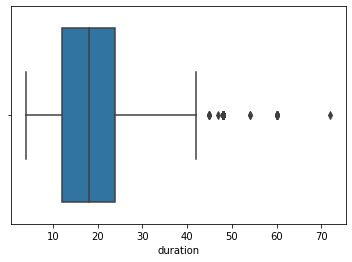

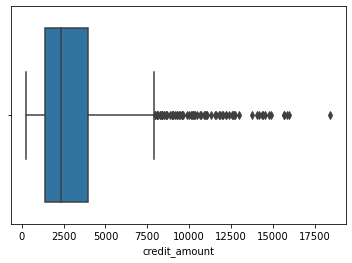

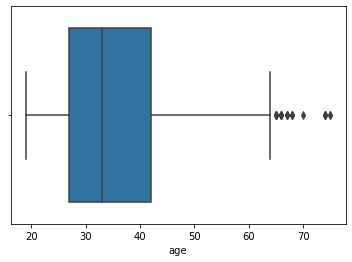

In [25]:
## Analyzing the Data using Box Plot

for i in numerical_columns:
    sns.boxplot(data=data,x=i)
    plt.show()

#### Outliers can be neglected as they are very less in number





In [26]:
## Data Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
data_scaled=scaler.fit_transform(data[['duration', 'credit_amount', 'age']])

In [28]:
data['duration']

0       6
1      48
2      12
3      42
4      24
       ..
995    12
996    30
997    12
998    45
999    45
Name: duration, Length: 1000, dtype: int64

(array([[180., 366., 241., 126.,  17.,  54.,  15.,   0.,   1.,   0.],
        [133., 491., 188.,  78.,  54.,  23.,  17.,   9.,   6.,   1.],
        [240., 308., 217., 122.,  54.,  41.,  12.,   6.,   0.,   0.]]),
 array([-1.4552613 , -0.77265628, -0.09005125,  0.59255378,  1.2751588 ,
         1.95776383,  2.64036886,  3.32297388,  4.00557891,  4.68818394,
         5.37078896]),
 <a list of 3 BarContainer objects>)

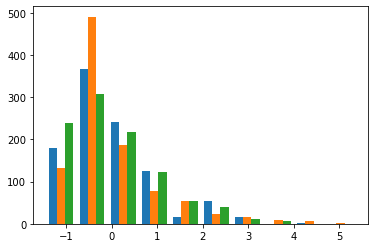

In [29]:
plt.hist(data_scaled)

In [30]:
numerical_scaled = pd.DataFrame(data_scaled,columns=['duration_scaled', 'credit_amount_scaled', 'age_scaled'])

In [31]:
numerical_scaled['duration_scaled']

0     -1.236478
1      2.248194
2     -0.738668
3      1.750384
4      0.256953
         ...   
995   -0.738668
996    0.754763
997   -0.738668
998    1.999289
999    1.999289
Name: duration_scaled, Length: 1000, dtype: float64

(array([171., 262., 337.,  57.,  86.,  17.,  54.,   2.,  13.,   1.]),
 array([-1.40241463, -0.83822961, -0.27404458,  0.29014045,  0.85432547,
         1.4185105 ,  1.98269553,  2.54688055,  3.11106558,  3.67525061,
         4.23943563]),
 <BarContainer object of 10 artists>)

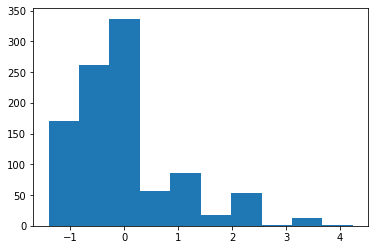

In [32]:
plt.hist(numerical_scaled['duration_scaled'])

In [33]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
data_scaled_minmax=minmax.fit_transform(data[['duration', 'credit_amount', 'age']])
numerical_scaled_minmax=pd.DataFrame(data_scaled,columns=['duration_scaled','credit_amount_scaled','age_scaled'])

(array([171., 262., 337.,  57.,  86.,  17.,  54.,   2.,  13.,   1.]),
 array([-1.40241463, -0.83822961, -0.27404458,  0.29014045,  0.85432547,
         1.4185105 ,  1.98269553,  2.54688055,  3.11106558,  3.67525061,
         4.23943563]),
 <BarContainer object of 10 artists>)

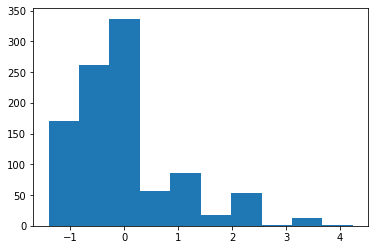

In [34]:
plt.hist(numerical_scaled_minmax['duration_scaled'])

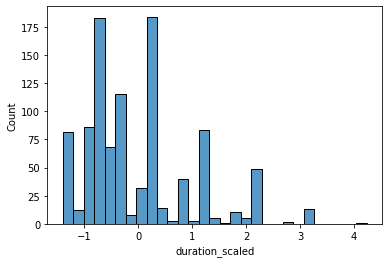

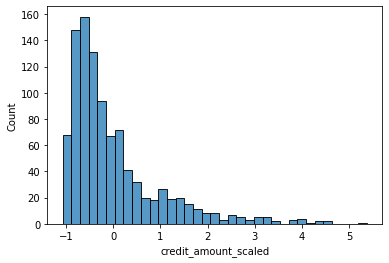

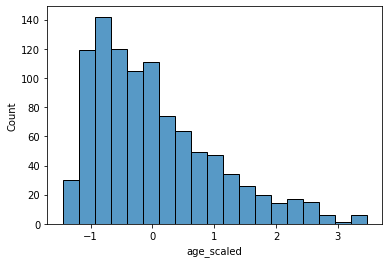

In [35]:
for i in ['duration_scaled','credit_amount_scaled','age_scaled']:
    sns.histplot(data=numerical_scaled,x = i)
    plt.show()

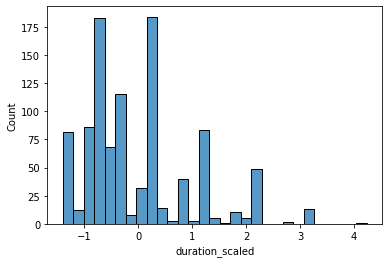

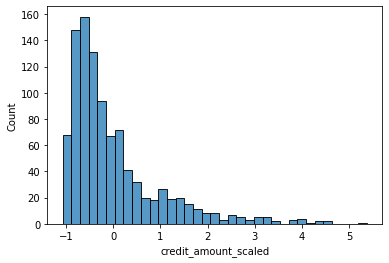

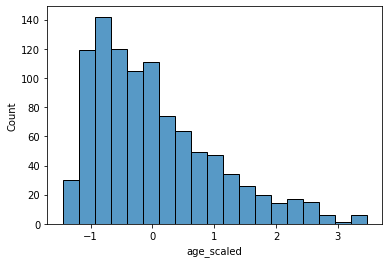

In [36]:
for i in ['duration_scaled', 'credit_amount_scaled', 'age_scaled']:
    sns.histplot(data = numerical_scaled_minmax , x = i)
    plt.show();

In [37]:
numerical_columns

['duration', 'credit_amount', 'age']

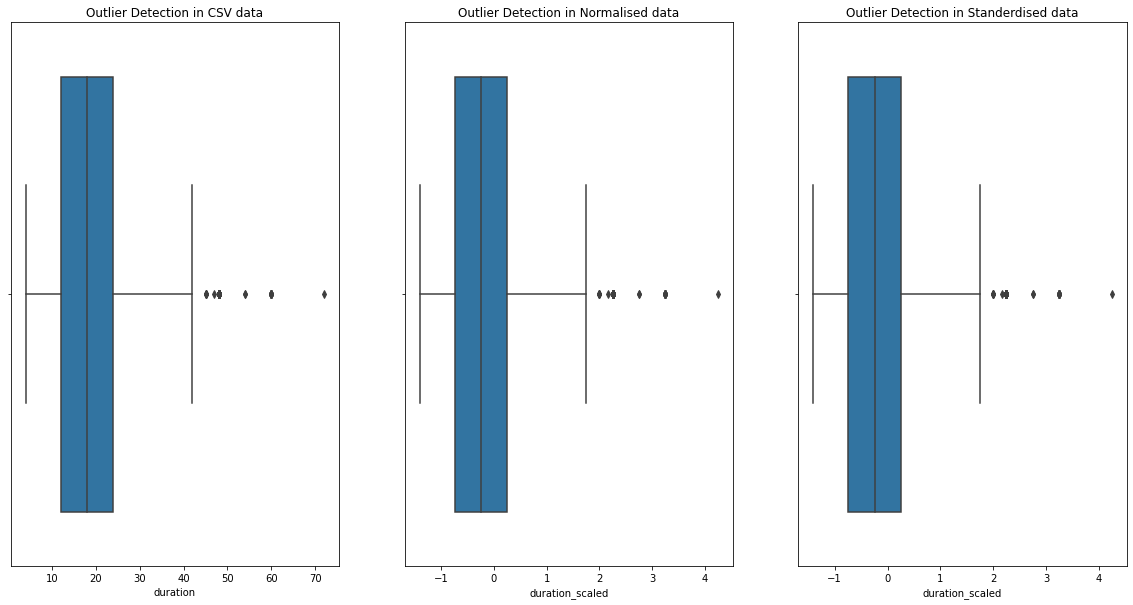

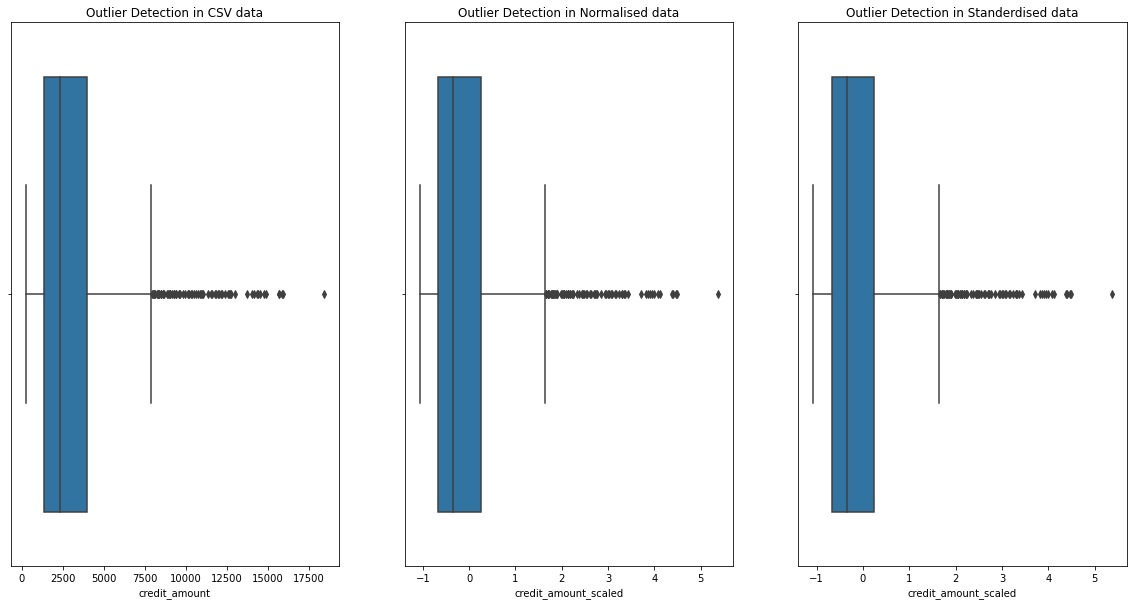

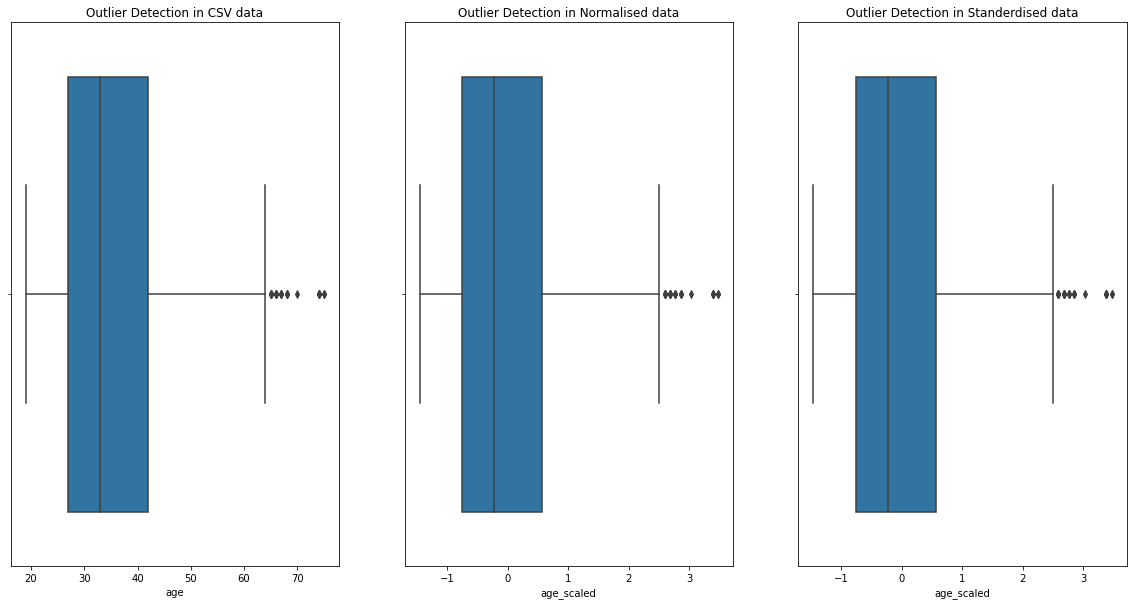

In [38]:
numerical_columns = ['duration', 'credit_amount', 'age']
scaled_features = ['duration_scaled', 'credit_amount_scaled', 'age_scaled']
for i,j in zip(numerical_columns,scaled_features):
    plt.figure(figsize=[20,10])
    plt.subplot(1,3,1)
    sns.boxplot(data=data,x=i)
    plt.title('Outlier Detection in CSV data')
    
    plt.subplot(1,3,2)
    sns.boxplot(data=numerical_scaled_minmax,x=j)
    plt.title('Outlier Detection in Normalised data')
    
    plt.subplot(1,3,3)
    sns.boxplot(data=numerical_scaled,x=j)
    plt.title('Outlier Detection in Standerdised data')
    

In [39]:
# Bi variate data analysis
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53,none,for free,2.0,skilled,2.0,none,yes,bad


In [40]:
data['class'].value_counts()

good    700
bad     300
Name: class, dtype: int64

#### We can see that number of people in class good is 700 and in class bad is 300

In [41]:
for i in data.columns:
    print(data.groupby(by=[i,'class'])['class'].count())

checking_status  class
0<=X<200         bad      105
                 good     164
<0               bad      135
                 good     139
>=200            bad       14
                 good      49
no checking      bad       46
                 good     348
Name: class, dtype: int64
duration  class
4         good       6
5         good       1
6         bad        9
          good      66
7         good       5
8         bad        1
          good       6
9         bad       14
          good      35
10        bad        3
          good      25
11        good       9
12        bad       49
          good     130
13        good       4
14        bad        1
          good       3
15        bad       12
          good      52
16        bad        1
          good       1
18        bad       42
          good      71
20        bad        1
          good       7
21        bad        9
          good      21
22        good       2
24        bad       56
          good     128
26   

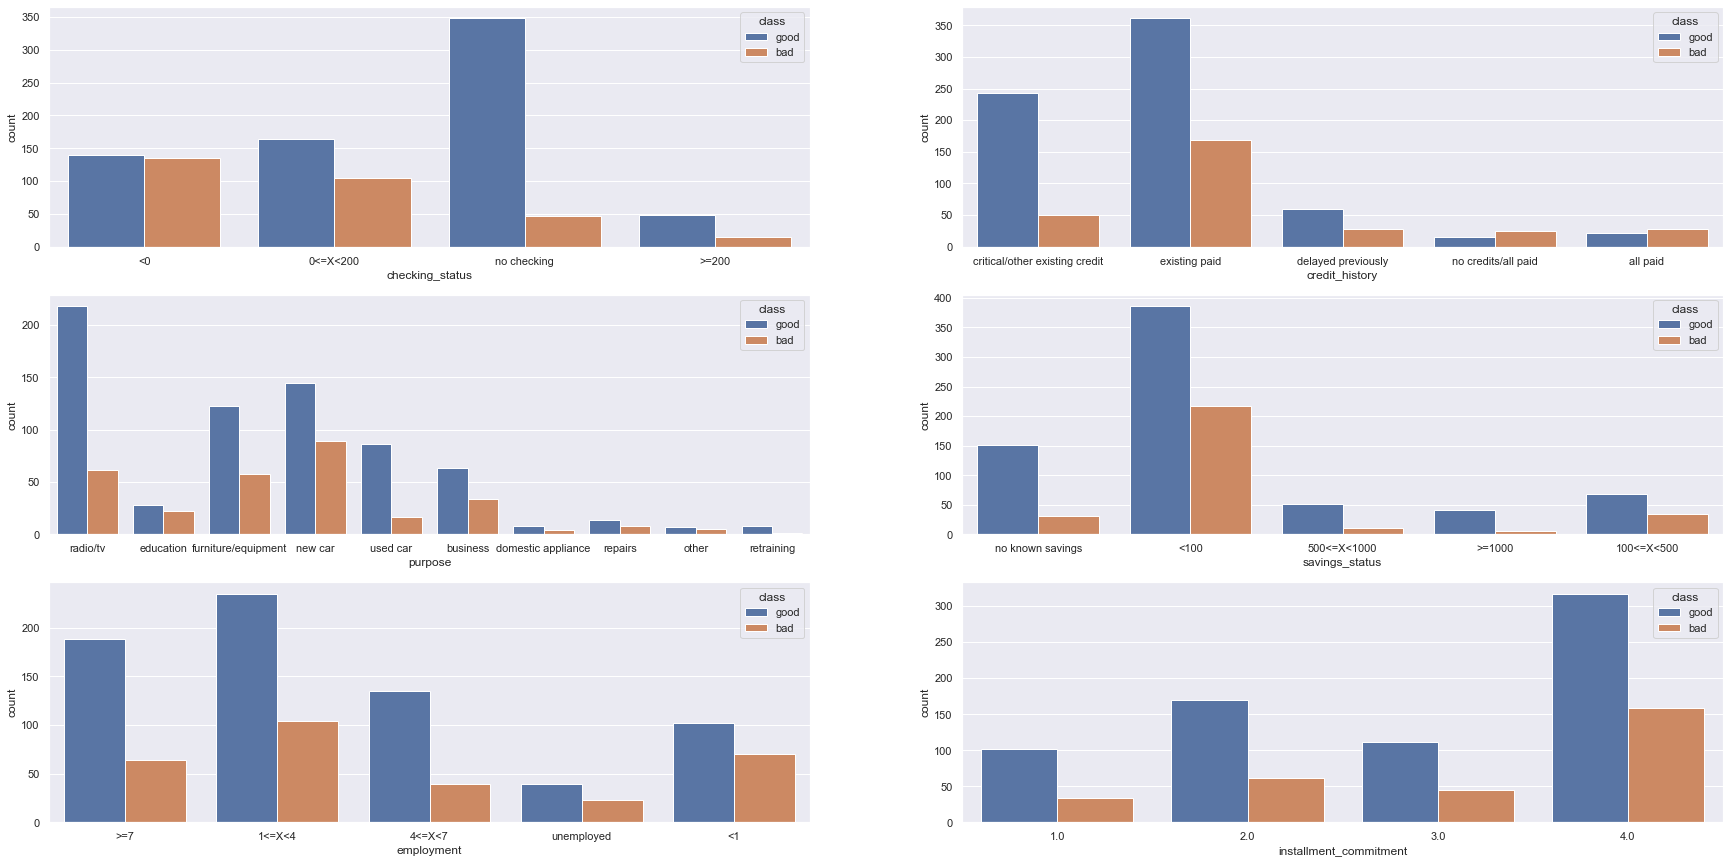

In [42]:
sns.set(rc={'figure.figsize':(30,15)})

plt.subplot(3,2,1)
sns.countplot(data=data, x = 'checking_status',hue='class' )

plt.subplot(3,2,2)
sns.countplot(data=data, x = 'credit_history',hue='class' )

plt.subplot(3,2,3)
sns.countplot(data=data, x = 'purpose',hue='class' )

plt.subplot(3,2,4)
sns.countplot(data=data, x = 'savings_status',hue='class' )

plt.subplot(3,2,5)
sns.countplot(data=data, x = 'employment',hue='class' )

plt.subplot(3,2,6)
sns.countplot(data=data, x = 'installment_commitment',hue='class' )

plt.savefig("Relation of Categorical Columns with Class First Diagram")

plt.show()

* Generally for all the checking status customers who are not risky for credit are more than number of risky customers but most of those who have no checking as checking status are very less risky customer and have class good and credit can be granted to them without any second thought.

* Most of the customers having credit history as existing paid are not risky for credit. Same is the case for critical/other existing credit. In customers who have credit history as no credits/all paid & all paid there are more number of customers who are in bad class, hence they are risky but a small credit can be given to them because they will pay back the money later and that credit will not go in NPA because they are in class of no credits or all paid which clearly shows they return the money but not in time

* Most of the customers who take credit for radio,TV,furniture,new car and retraining generally pay of the loan and they are not risky customers.

* Customers who are having savings_status between 500 to 1000 are generally very less risky customers

* Customers who are employed between 1 and 4 are generally less risky. Same is the case for employment greater than 7

* Most of the customers who are having installment commitment of 4 are less risky



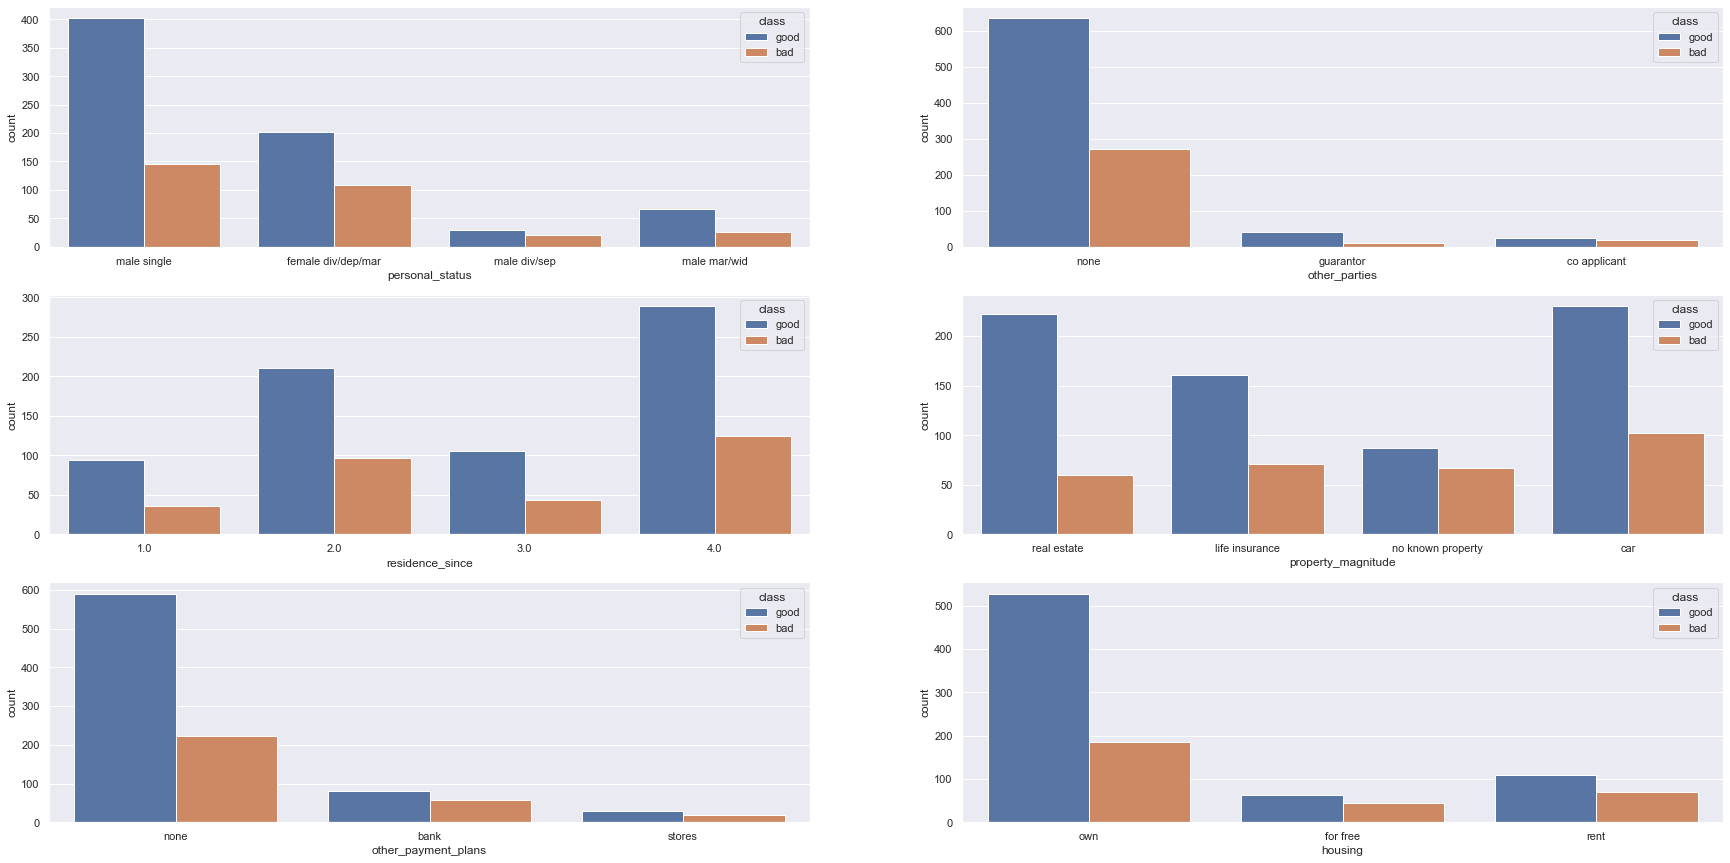

In [43]:
sns.set(rc={'figure.figsize':(30,15)})

plt.subplot(3,2,1)
sns.countplot(data=data, x = 'personal_status',hue='class' )

plt.subplot(3,2,2)
sns.countplot(data=data, x = 'other_parties',hue='class' )

plt.subplot(3,2,3)
sns.countplot(data=data, x = 'residence_since',hue='class' )

plt.subplot(3,2,4)
sns.countplot(data=data, x = 'property_magnitude',hue='class' )

plt.subplot(3,2,5)
sns.countplot(data=data, x = 'other_payment_plans',hue='class' )

plt.subplot(3,2,6)
sns.countplot(data=data, x = 'housing',hue='class' )

plt.savefig("Relation of Categorical Columns with Class Second Diagram")

plt.show()



* Customers who are residing for a longer period of time are less risky.

* Customers who own the house are generally less risky as compared to those who does not posses a property

* Customer who posses car and also investment in real estate are less risky

* Individual loan account customers are less risky than loan accounts where co-applicant and guarantor are involved

* Customers who have existing credit of less than 3 are more risky to customers who have more existing credits

* Customers who are skilled are less risky compared to others



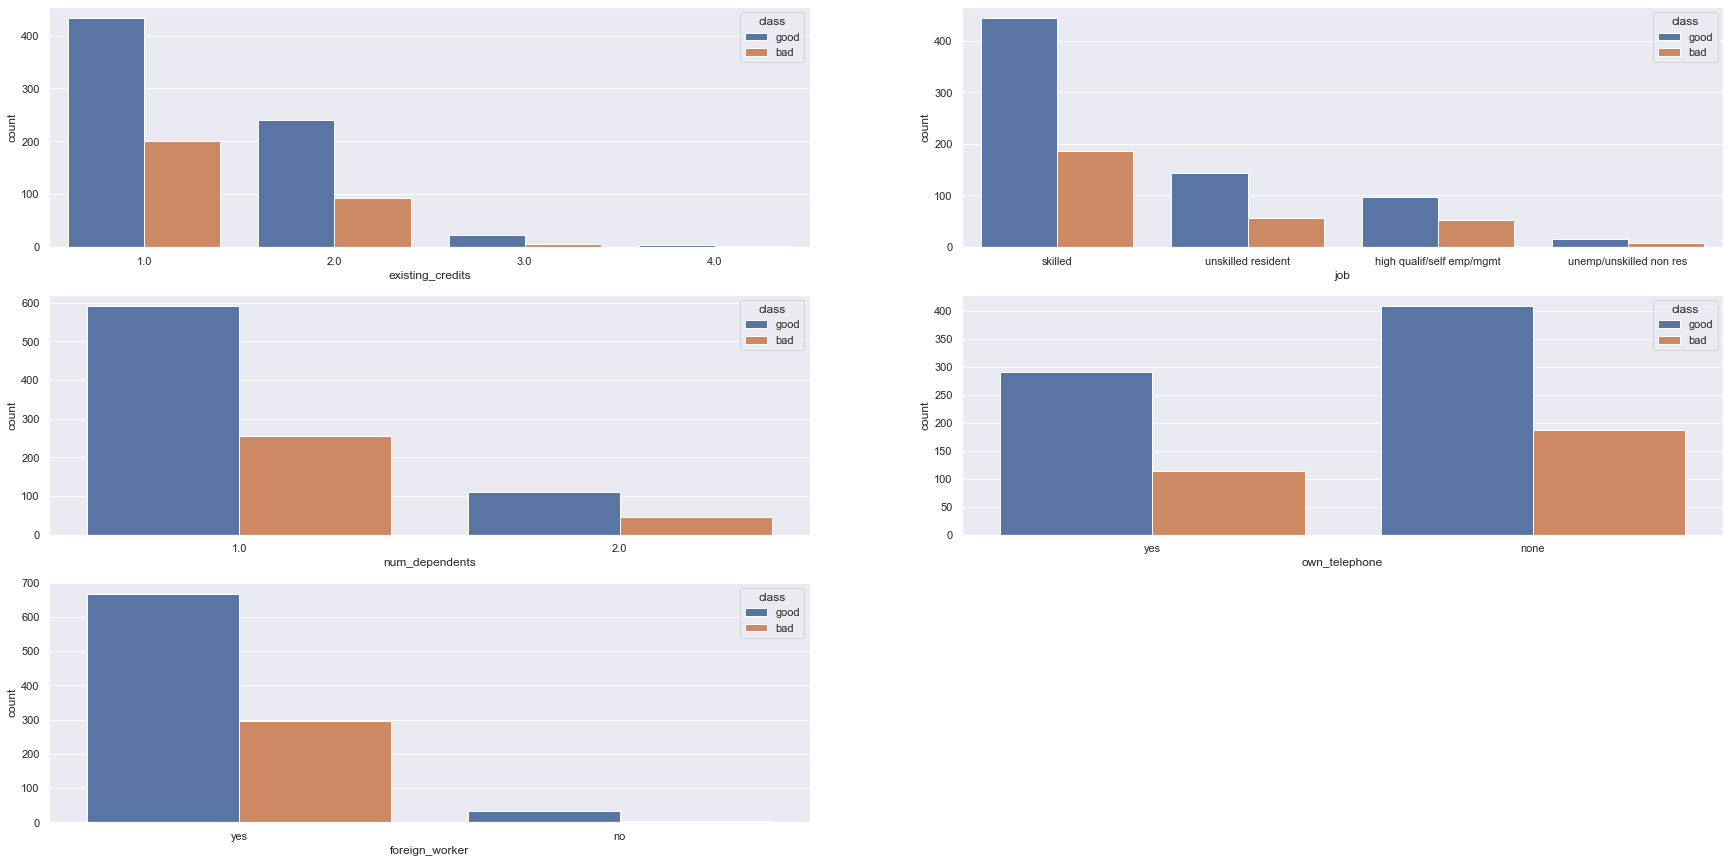

In [44]:
sns.set(rc={'figure.figsize':(30,15)})

plt.subplot(3,2,1)
sns.countplot(data=data, x = 'existing_credits',hue='class' )

plt.subplot(3,2,2)
sns.countplot(data=data, x = 'job',hue='class' )

plt.subplot(3,2,3)
sns.countplot(data=data, x = 'num_dependents',hue='class' )

plt.subplot(3,2,4)
sns.countplot(data=data, x = 'own_telephone',hue='class' )

plt.subplot(3,2,5)
sns.countplot(data=data, x = 'foreign_worker',hue='class' )

plt.savefig("Relation of Categorical Columns with Class Third Diagram")

plt.show()

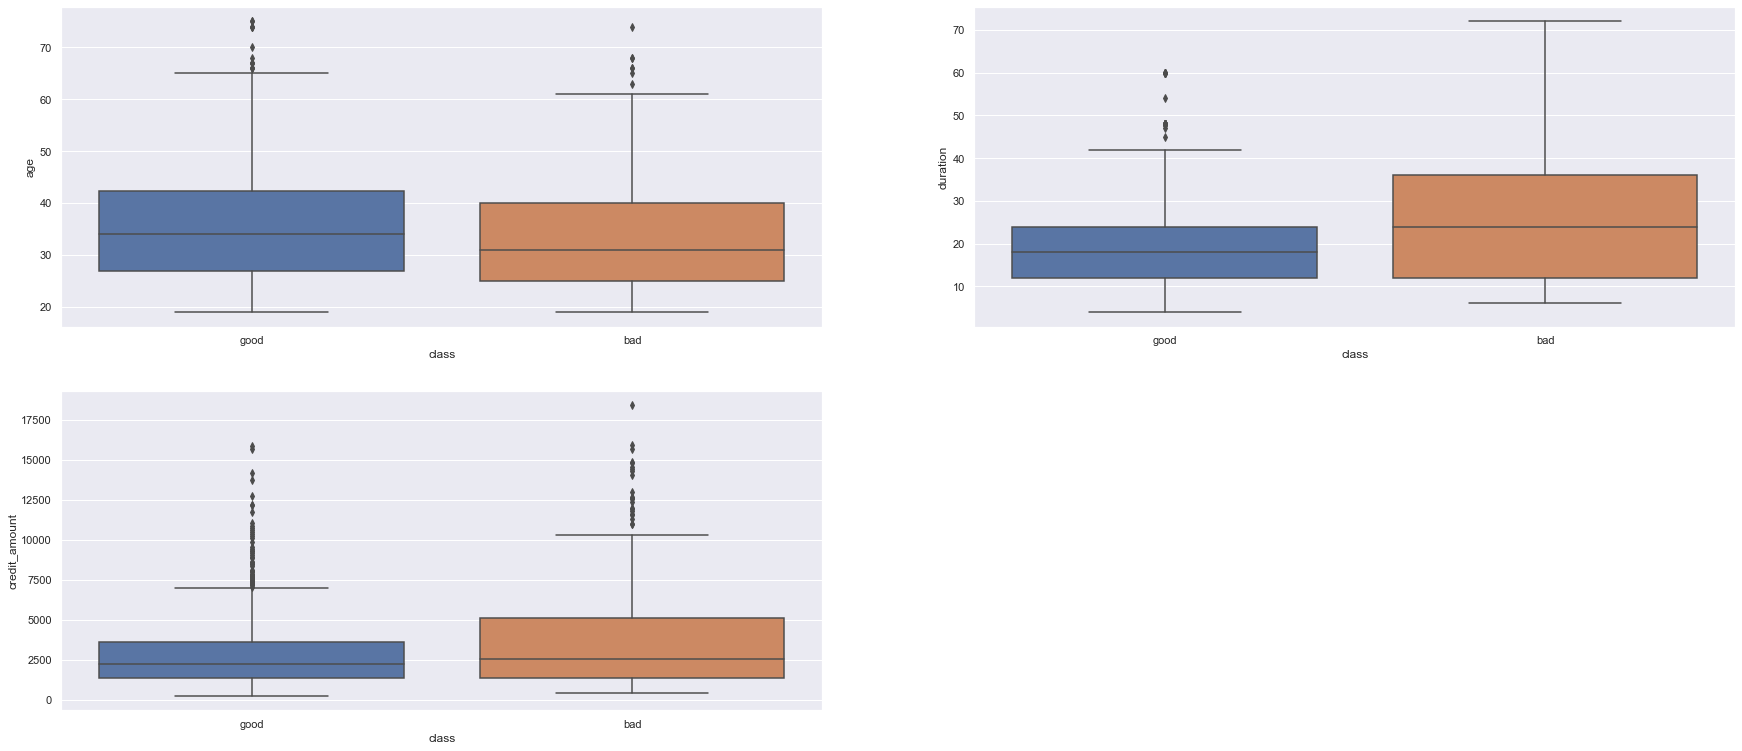

In [49]:
sns.set(rc={'figure.figsize':(30,20)})

plt.subplot(3,2,1)
sns.boxplot(data=data, x = 'class',y='age' )

plt.subplot(3,2,2)
sns.boxplot(data=data, x = 'class',y='duration' )

plt.subplot(3,2,3)
sns.boxplot(data=data, x = 'class',y='credit_amount' )

plt.savefig("Relation of Continuous Columns with Class")


plt.show()

* Customers whose age is between 25 to 45 are who are need of credit. Customers who are above 40 years of age are very less risky compared to other age groups.

* Customers where duration of credit is less are less risky. And as the duration of credit increases the risk of the customer also increases.

* Customers who take credit more than 3500 are very risky compared to customers who take less credit amount.

###   -----------

### Machine Learning Modelling

In [50]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53,none,for free,2.0,skilled,2.0,none,yes,bad


In [51]:
data.shape

(1000, 21)

In [52]:
## Encoding the categorical columns

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in categorical_data:
    data[i] = encoder.fit_transform(data[i])



In [53]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6,1,6,1169.0,4,3,3,3,2,...,3,67,1,1,1,1,0,1,1,1
1,0,48,3,6,5951.0,2,0,1,0,2,...,3,22,1,1,0,1,0,0,1,0
2,3,12,1,2,2096.0,2,1,1,3,2,...,3,49,1,1,0,3,1,0,1,1
3,1,42,3,3,7882.0,2,1,1,3,1,...,1,45,1,0,0,1,1,0,1,1
4,1,24,2,4,4870.0,2,0,2,3,2,...,2,53,1,0,1,1,1,0,1,0


In [54]:
# Separate the features and target
# Separate X and y
X = data.drop(['class'],axis = 1)
y = data['class']

In [55]:
X.shape

(1000, 20)

In [56]:
y.shape

(1000,)

In [57]:
# Define the traind and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25)

In [58]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((750, 20), (250, 20), (750,), (250,))

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [60]:
# Start the training
# you tell your model based on your X data what is corresponding value of y or target

model.fit(X_train,y_train)

C:\Users\sneha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
predictions = model.predict(X_test)

In [62]:
predictions

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1])

In [63]:
y_test.values

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1])

In [64]:
from sklearn.metrics import accuracy_score
print("The accuracy of the logistic regression model is :", accuracy_score(predictions,y_test)*100)

The accuracy of the logistic regression model is : 75.2


In [65]:
predictions_train_data = model.predict(X_train)

In [66]:
predictions_train_data

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [67]:
y_train.values

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [68]:
print("The Training accuracy of the logistic regression model is :", accuracy_score(predictions_train_data,y_train.values)*100)

The Training accuracy of the logistic regression model is : 71.46666666666667


#### Logistic Regression Hyper Parameter Tuning

In [69]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [72]:
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\sneha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sneha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sneha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sneha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(

In [73]:
best_clf.best_estimator_


LogisticRegression(C=0.012742749857031334, solver='newton-cg')

In [74]:
best_clf_predictions_train=best_clf.best_estimator_.predict(X_train)


In [75]:
best_clf_predictions_=best_clf.best_estimator_.predict(X_test)


In [76]:
best_clf_predictions_train

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [77]:
print("The accuracy of the logistic regression model is :", accuracy_score(best_clf_predictions_,y_test)*100)

The accuracy of the logistic regression model is : 75.2


In [80]:
print("The Training accuracy of the logistic regression model is :", accuracy_score(best_clf_predictions_train,y_train)*100)

The Training accuracy of the logistic regression model is : 71.6


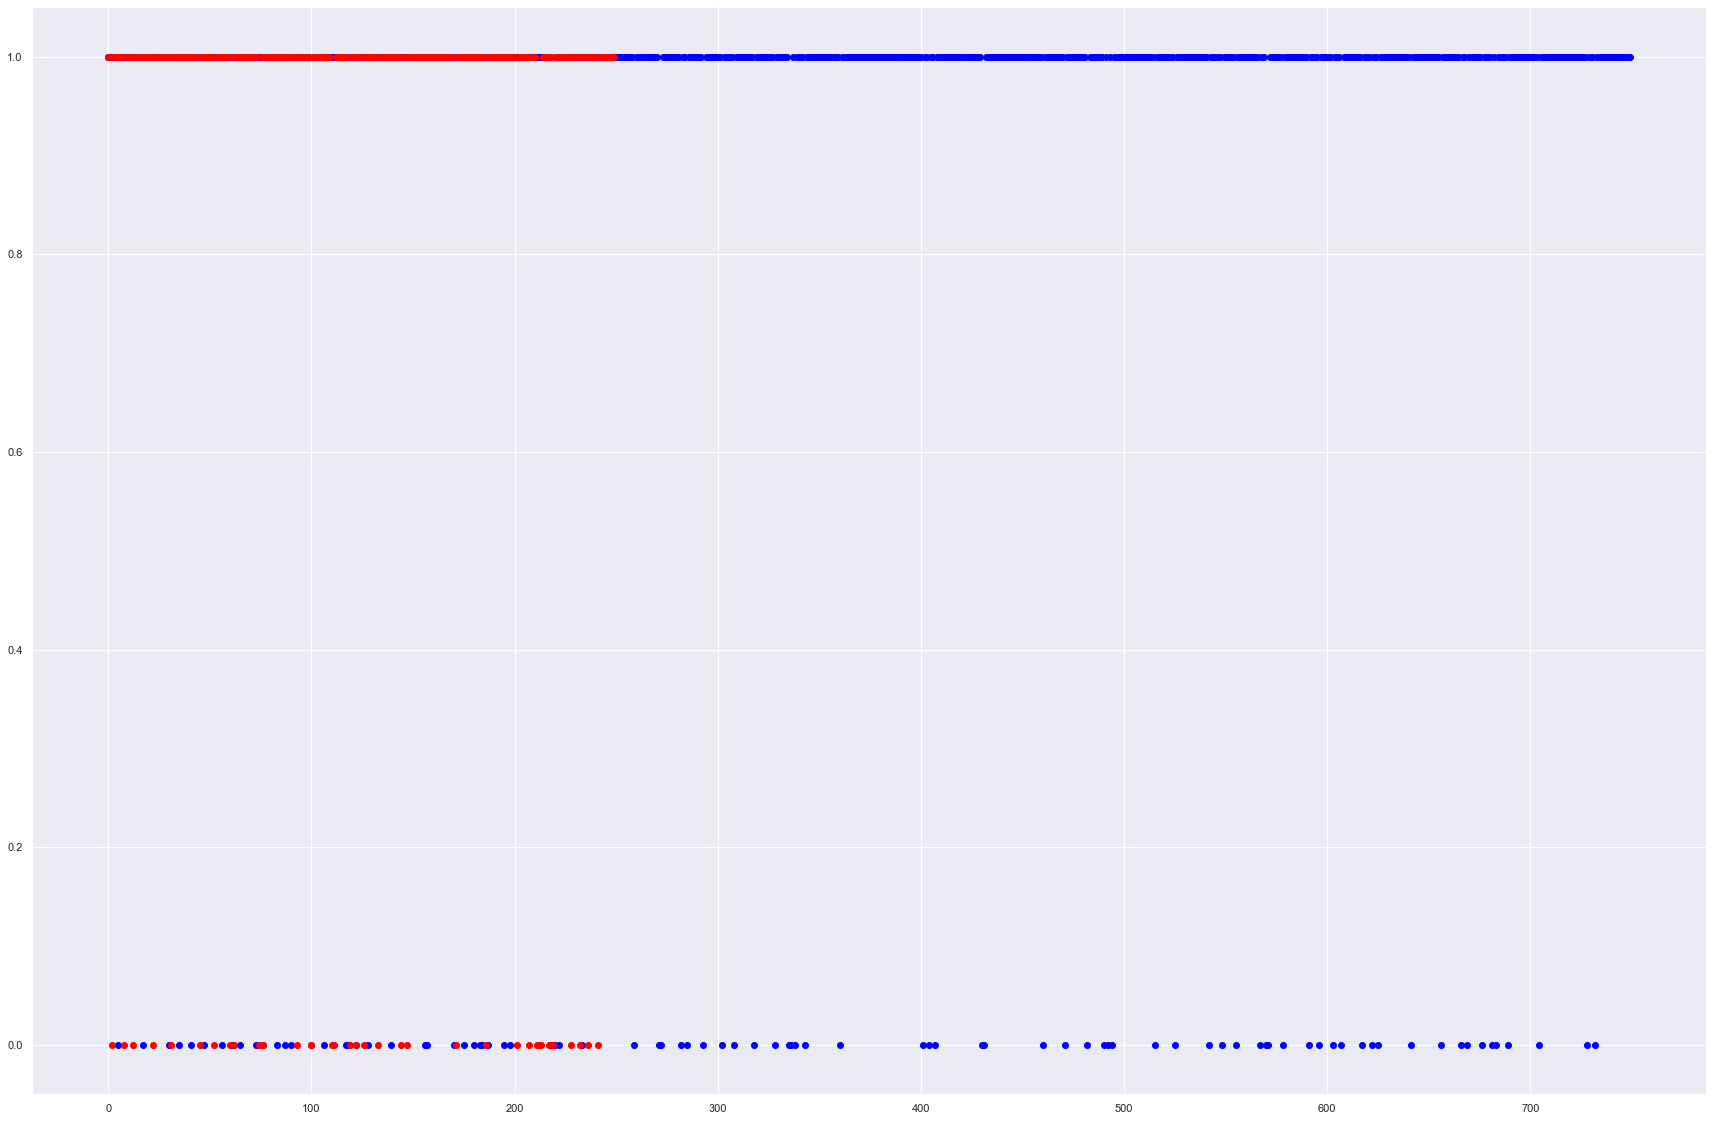

In [198]:
training_samples_index = range(0,len(y_train))
test_samples_index = range(0,len(y_test))

plt.scatter(training_samples_index, best_clf_predictions_train, color = "blue")
plt.scatter(test_samples_index, best_clf_predictions_, color = "red")
plt.savefig("Logistic Regression")

### KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# Begin Training

knn.fit(X_train,y_train)

# Getting predictions

predictions = knn.predict(X_test)

In [83]:
predictions

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
print("The accuracy score of KNN Model is",accuracy_score(predictions,y_test)*100)

The accuracy score of KNN Model is 65.60000000000001


In [86]:
predictions_training = knn.predict(X_train)

In [87]:
predictions_training

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [88]:
y_train.values

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [89]:
print("The Training accuracy score of KNN Model is",accuracy_score(predictions_training,y_train)*100)

The Training accuracy score of KNN Model is 74.93333333333332


In [90]:
variance = 100 - accuracy_score(predictions,y_test)*100

In [91]:
variance

34.39999999999999

### KNN Hyper parameter Tuning

In [92]:


from sklearn.neighbors import KNeighborsClassifier

k_list = range(1,40)
variance_list = []
bias_list = []

for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k)
    # Begin Training
    knn.fit(X_train,y_train)
    
    # Getting Predictions
    y_pred = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)
    variance = 100- accuracy_score(y_pred,y_test)*100
    bias = 100-accuracy_score(y_pred_train,y_train)*100
    variance_list.append(variance)
    bias_list.append(bias)

In [93]:
variance_list

[35.2,
 44.39999999999999,
 34.0,
 38.800000000000004,
 34.39999999999999,
 40.400000000000006,
 30.400000000000006,
 32.39999999999999,
 29.60000000000001,
 29.60000000000001,
 28.400000000000006,
 28.799999999999997,
 29.60000000000001,
 30.0,
 28.799999999999997,
 29.60000000000001,
 29.200000000000003,
 30.0,
 29.200000000000003,
 30.0,
 28.0,
 28.400000000000006,
 27.200000000000003,
 28.400000000000006,
 27.200000000000003,
 26.799999999999997,
 27.200000000000003,
 26.799999999999997,
 27.60000000000001,
 27.60000000000001,
 27.200000000000003,
 27.60000000000001,
 28.0,
 27.60000000000001,
 27.200000000000003,
 27.200000000000003,
 27.200000000000003,
 27.200000000000003,
 27.200000000000003]

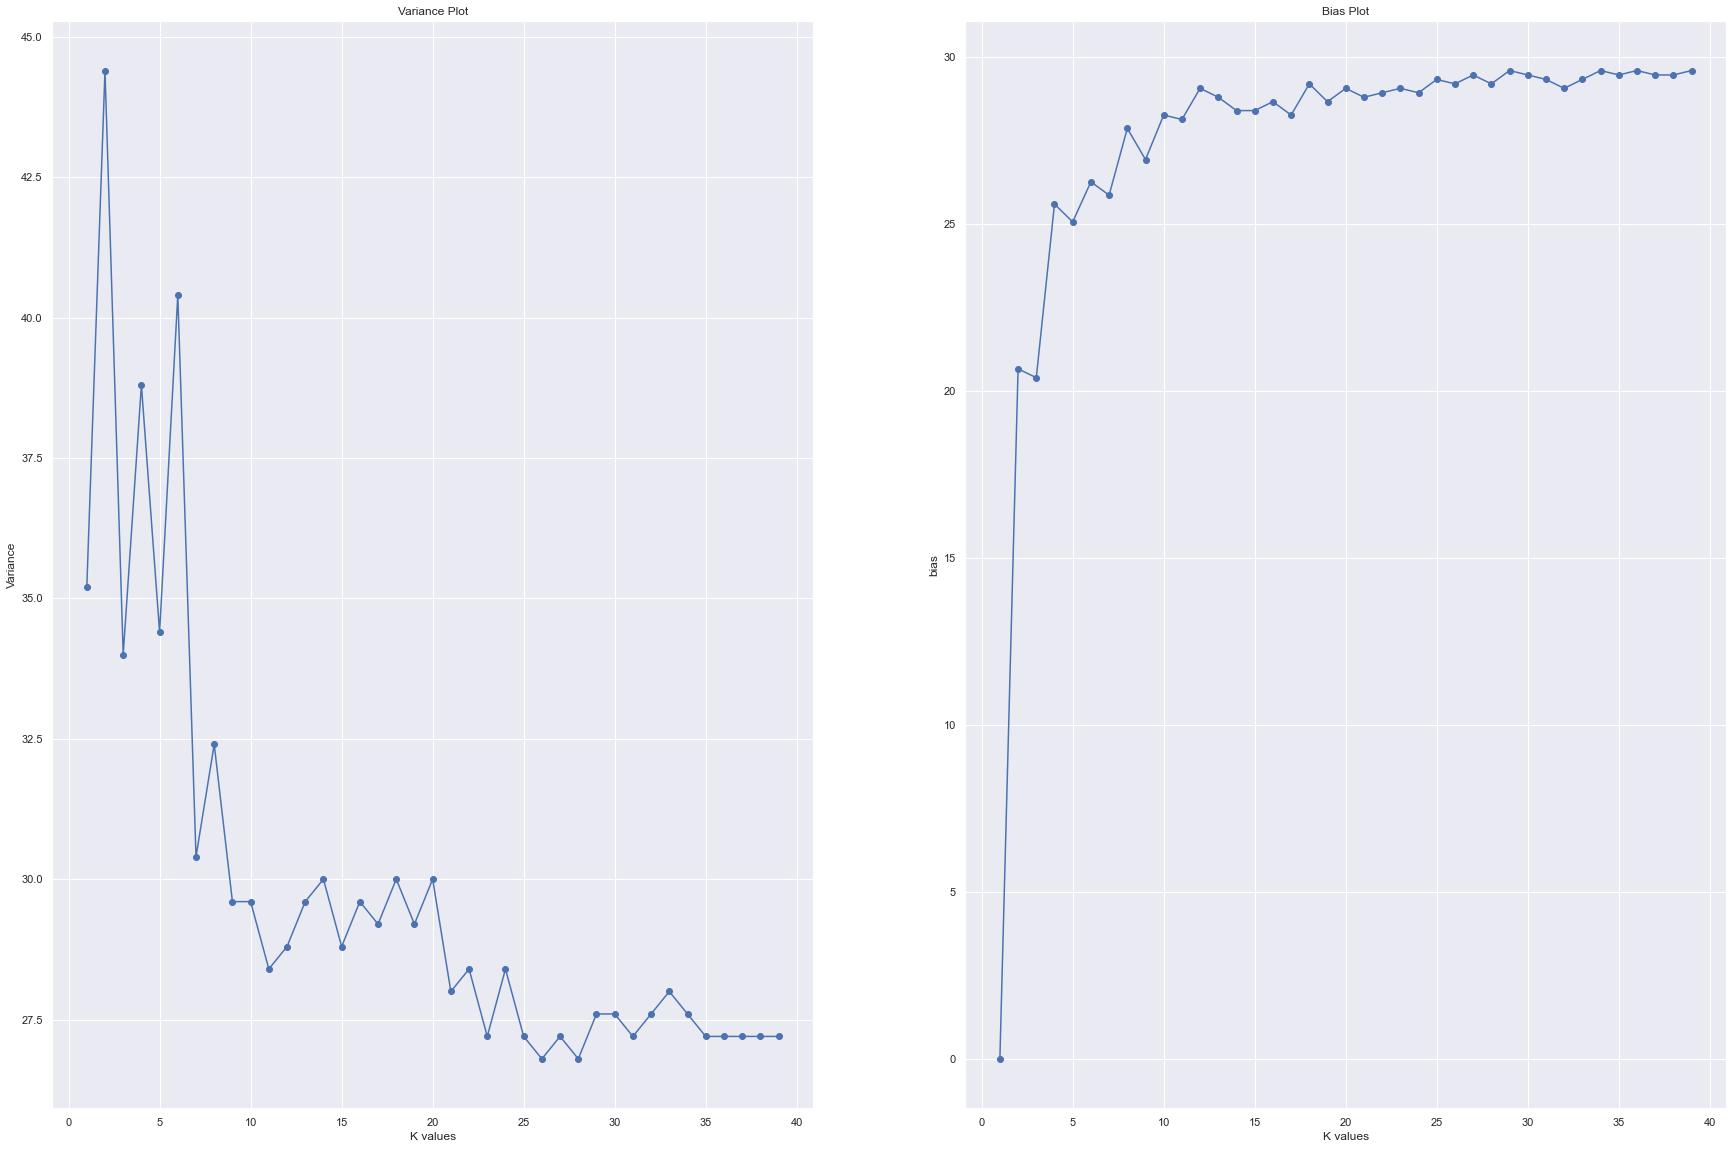

In [94]:
plt.subplot(1,2,1)
plt.scatter(k_list,variance_list)
plt.plot(k_list,variance_list)
plt.xlabel("K values")
plt.ylabel("Variance")
plt.title('Variance Plot')

plt.subplot(1,2,2)
plt.scatter(k_list,bias_list)
plt.plot(k_list,bias_list)
plt.xlabel("K values")
plt.ylabel("bias")
plt.title("Bias Plot")
plt.show()

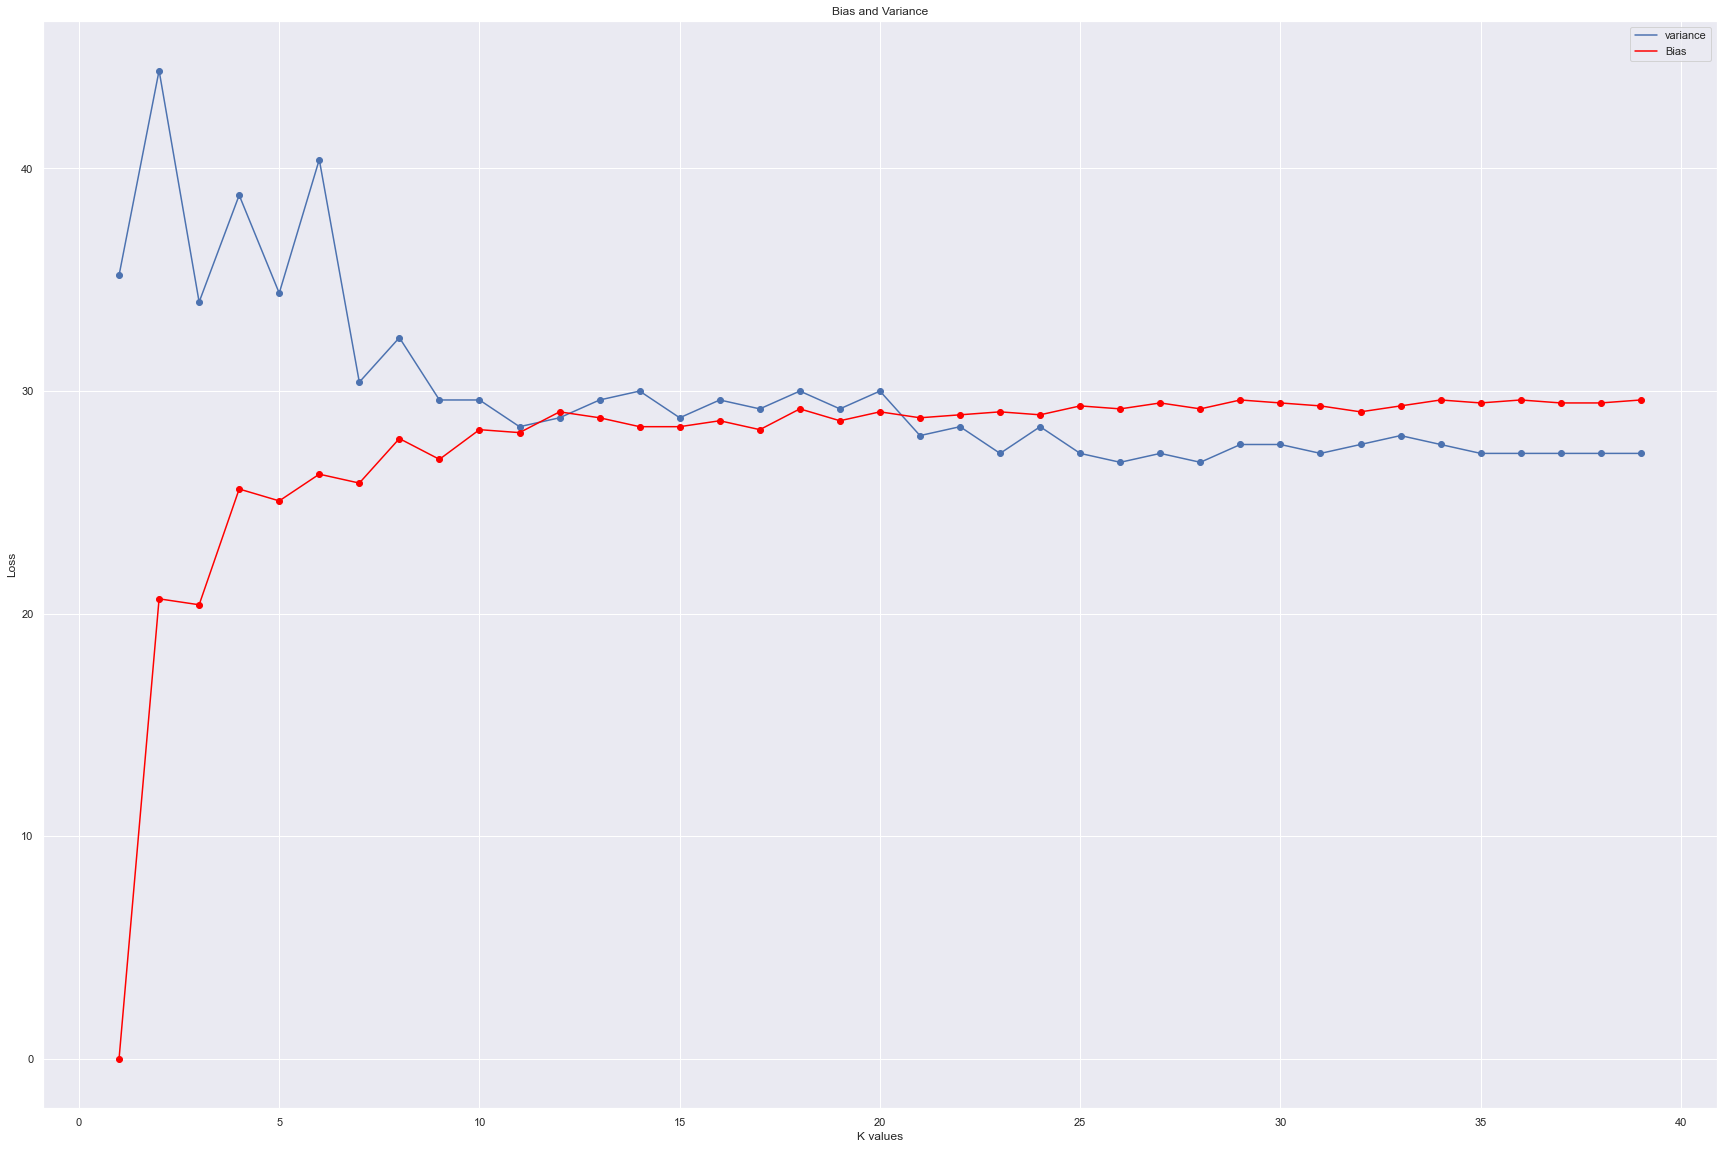

In [199]:
plt.scatter(k_list,variance_list)
plt.plot(k_list,variance_list, label = 'variance')
plt.scatter(k_list,bias_list,color='red')
plt.plot(k_list,bias_list,color='red',label = 'Bias')
plt.xlabel("K values")
plt.ylabel("Loss")
plt.legend()
plt.title("Bias and Variance")
plt.savefig("KNN BIAS VARIANCE TRADE OFF")

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)

# Begin Training

knn.fit(X_train,y_train)

# Getting predictions

predictions__ = knn.predict(X_test)

In [97]:
predictions__

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [98]:
print("The accuracy score of KNN Model is",accuracy_score(predictions__,y_test)*100)

The accuracy score of KNN Model is 70.39999999999999


In [99]:
predictions__train = knn.predict(X_train)

In [100]:
print("The Training accuracy score of KNN Model is",accuracy_score(predictions__train,y_train)*100)

The Training accuracy score of KNN Model is 71.2


### KNN HYPERPARAMETER TUNING

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


param_grid_knn = {"n_neighbors":range(5,30),
                "algorithm":['auto','ball_tree',"kd_tree",'brute'],
                 "weights":["uniform",'distance']}
grid_search_knn = GridSearchCV(estimator= knn,
                          param_grid= param_grid_knn,
                           n_jobs=-1)
grid_search_knn.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=13), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(5, 30),
                         'weights': ['uniform', 'distance']})

In [102]:
grid_search_knn.best_estimator_

KNeighborsClassifier(n_neighbors=21)

In [103]:
random_search_knn = RandomizedSearchCV(estimator= knn,
                          param_distributions= param_grid_knn,
                           n_jobs=-1)
random_search_knn.fit(X_train,y_train)

RandomizedSearchCV(estimator=KNeighborsClassifier(n_neighbors=13), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': range(5, 30),
                                        'weights': ['uniform', 'distance']})

In [104]:
random_search_knn.fit(X_train,y_train)
random_search_knn.best_estimator_

KNeighborsClassifier(n_neighbors=19)

In [170]:
grid_search_knn_best = KNeighborsClassifier(n_neighbors=21)
grid_search_knn_best.fit(X_train,y_train)
#knn_best_predictions = knn_best.predict(X_test)


KNeighborsClassifier(n_neighbors=21)

In [171]:
grid_search_knn_best_predictions = grid_search_knn_best.predict(X_test)

In [172]:
grid_search_knn_best_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [173]:
print("The accuracy of grid search CV is",accuracy_score(grid_search_knn_best_predictions,y_test)*100)

The accuracy of grid search CV is 72.0


In [174]:
grid_search_knn_best_predictions_train = grid_search_knn_best.predict(X_train)

In [175]:
print("The Training accuracy of grid search CV is",accuracy_score(grid_search_knn_best_predictions_train,y_train)*100)

The Training accuracy of grid search CV is 71.2


In [176]:
random_search_knn_best = KNeighborsClassifier( n_neighbors=19)

In [177]:
random_search_knn_best.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [178]:
random_search_knn_best_predictions = random_search_knn_best.predict(X_test)

In [179]:
random_search_knn_best_predictions

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [180]:
print("The accuracy of grid search CV is",accuracy_score(random_search_knn_best_predictions,y_test)*100)

The accuracy of grid search CV is 70.8


In [181]:
random_search_knn_best_predictions_train = random_search_knn_best.predict(X_train)

In [182]:
print("The Training accuracy of random search CV is",accuracy_score(random_search_knn_best_predictions_train,y_train)*100)

The Training accuracy of random search CV is 71.33333333333334


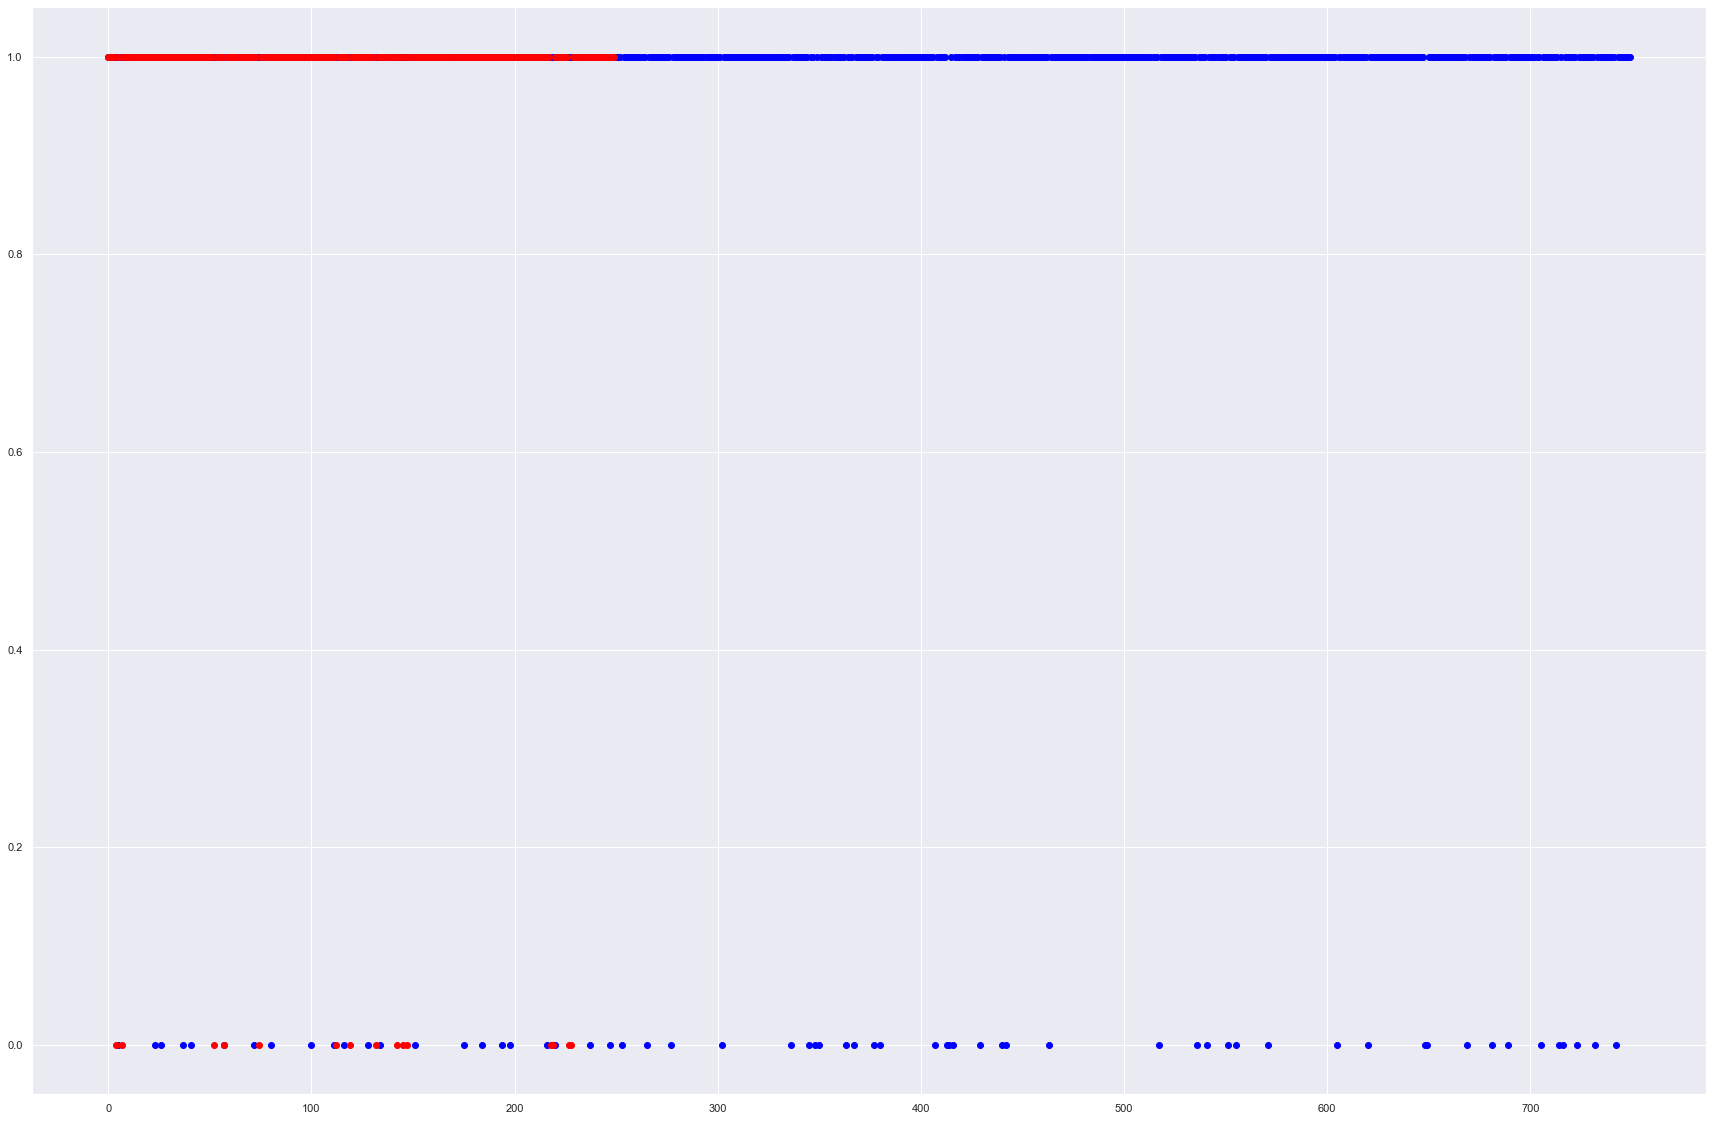

In [200]:
training_samples_index = range(0,len(y_train))
test_samples_index = range(0,len(y_test))

plt.scatter(training_samples_index,random_search_knn_best_predictions_train , color = "blue")
plt.scatter(test_samples_index, random_search_knn_best_predictions, color = "red")
plt.savefig("KNN")

### SVC

In [119]:
from sklearn.svm import SVC
model_svm = SVC()

 # Start the training:
model_svm.fit(X_train,y_train)
svm_predictions = model_svm.predict(X_test)

In [120]:
svm_predictions_train = model_svm.predict(X_train)
print("The Training accuracy of the SVM model is :", accuracy_score(svm_predictions_train,y_train)*100)

The Training accuracy of the SVM model is : 70.53333333333333


In [121]:
print("The accuracy of the SVM model is :", accuracy_score(svm_predictions,y_test)*100)

The accuracy of the SVM model is : 72.8


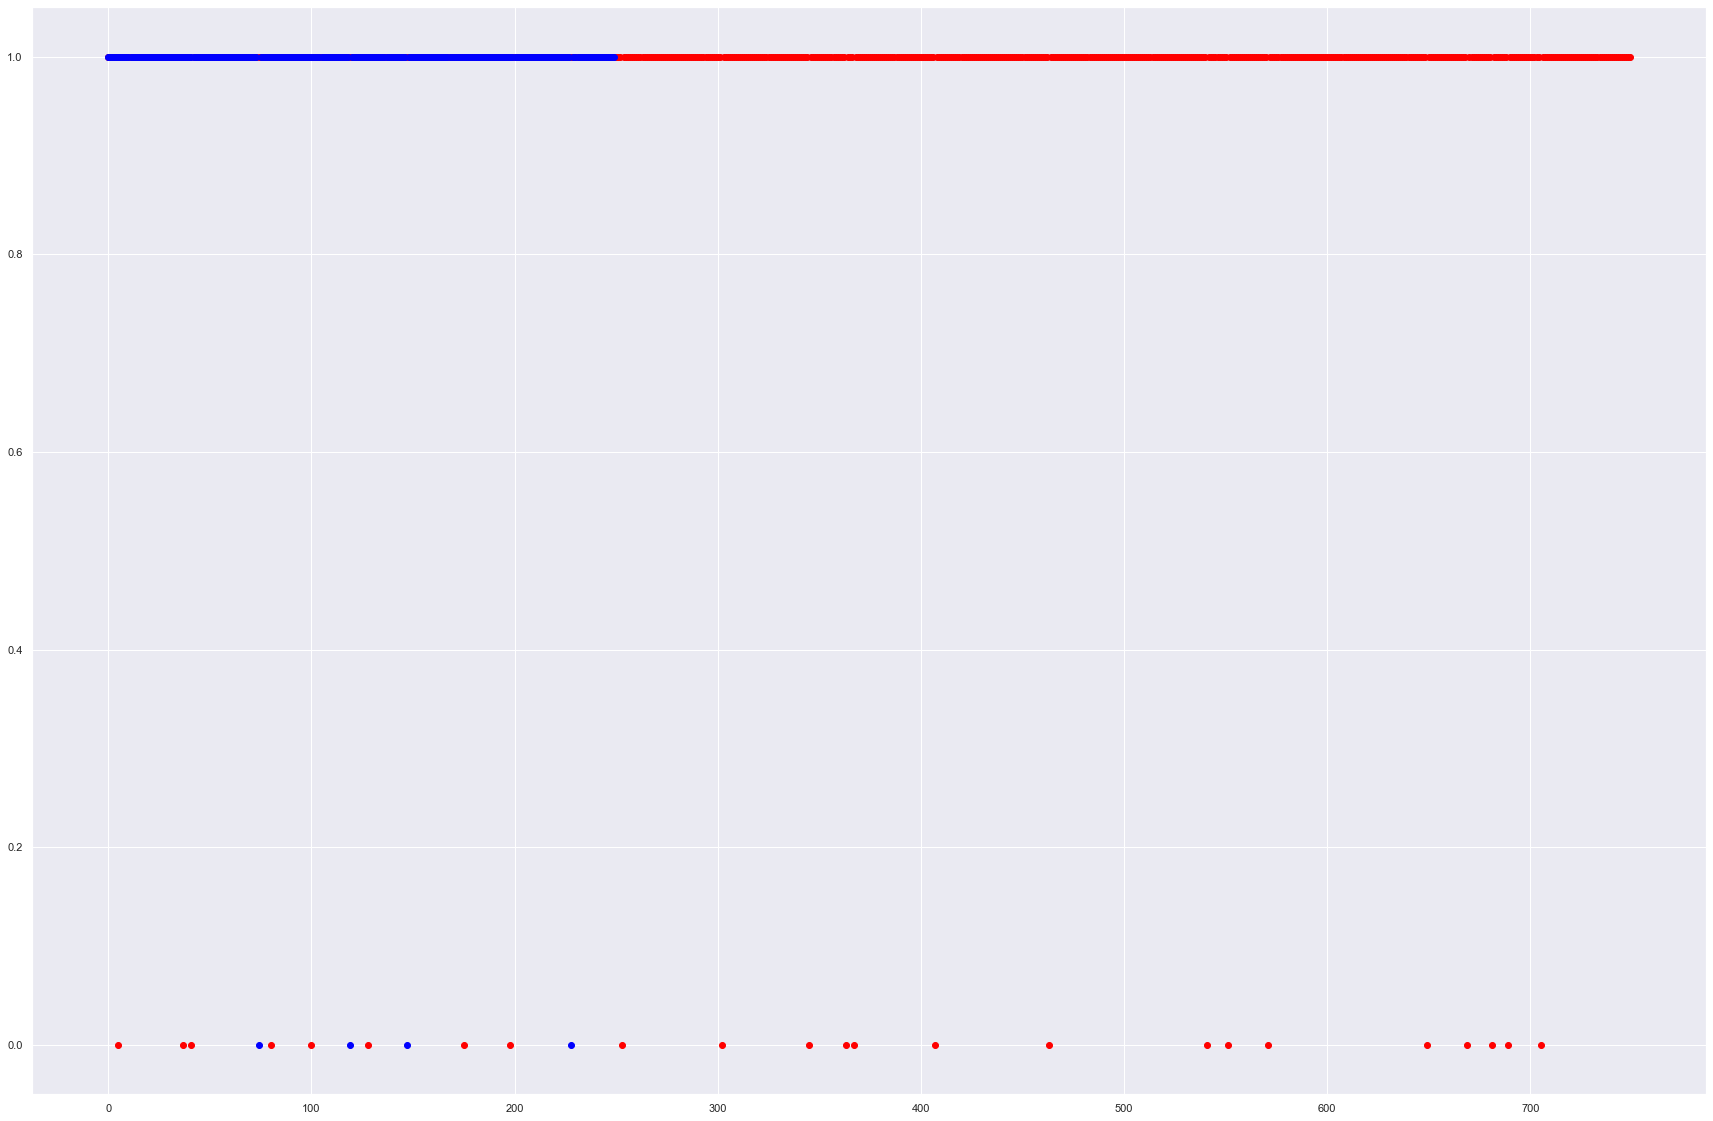

In [201]:
training_samples_index = range(0,len(y_train))
test_samples_index = range(0,len(y_test))

plt.scatter(training_samples_index, svm_predictions_train, color = "red")
plt.scatter(test_samples_index, svm_predictions, color = "blue")
plt.savefig("SVM")


### DECISION TREE

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
decision_tree = DecisionTreeClassifier()

In [126]:
# Start the Training:
decision_tree.fit(X_train , y_train)
# Getting predictions
dt_predictions = decision_tree.predict(X_test)

In [127]:
dt_predictions

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1])

In [128]:
print("The accuracy for Decision Tree is ",accuracy_score(dt_predictions,y_test)*100)

The accuracy for Decision Tree is  67.2


In [129]:
dt_predictions_train = decision_tree.predict(X_train)

In [130]:
dt_predictions_train

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [131]:
print("The Training accuracy for Decision Tree is ",accuracy_score(dt_predictions_train,y_train)*100)

The Training accuracy for Decision Tree is  100.0


### DT Hyper Parameter Tuning

In [132]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [133]:
param_grid = {"criterion" : ["gini", "entropy", "log_loss"],
            "splitter" : ["best", "random"],
            "max_features" : ["auto", "sqrt", "log2"]}

grid_search  = GridSearchCV(estimator = decision_tree , param_grid = param_grid)
random_search = RandomizedSearchCV(estimator = decision_tree , param_distributions = param_grid)

In [134]:
grid_search.fit(X_train, y_train)

C:\Users\sneha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sneha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sneha\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\sneha\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_me

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [135]:
random_search.fit(X_train, y_train)

C:\Users\sneha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sneha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sneha\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\sneha\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_me

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'splitter': ['best', 'random']})

In [136]:
random_search.best_params_

{'splitter': 'best', 'max_features': 'sqrt', 'criterion': 'entropy'}

In [137]:
grid_search.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}

In [163]:
dt_tuned_grid_search = DecisionTreeClassifier(criterion='entropy',
                                              max_features= 'auto',
                                              splitter= 'best')

In [164]:
dt_tuned_random_search = DecisionTreeClassifier(criterion='entropy',
                                              max_features= 'sqrt',
                                              splitter= 'best')

In [165]:
dt_tuned_grid_search.fit(X_train, y_train)
dt_tuned_random_search.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt')

In [166]:
tuned_dt_predictions_grid_search = dt_tuned_grid_search.predict(X_test)
tuned_dt_predictions_random_search = dt_tuned_random_search.predict(X_test)

In [167]:
print("Accuracy Score tuned_dt_predictions_grid_search :", accuracy_score(tuned_dt_predictions_grid_search,
                                                                          y_test))
print("Accuracy Score tuned_dt_predictions_random_search :", accuracy_score(tuned_dt_predictions_random_search,
                                                                          y_test))

Accuracy Score tuned_dt_predictions_grid_search : 0.704
Accuracy Score tuned_dt_predictions_random_search : 0.664


In [168]:
tuned_dt_predictions_grid_search_train = dt_tuned_grid_search.predict(X_train)
tuned_dt_predictions_random_search_train = dt_tuned_random_search.predict(X_train)

In [169]:
print("Accuracy Score tuned_dt_predictions_grid_search_train :", accuracy_score(tuned_dt_predictions_grid_search_train,
                                                                          y_train))
print("Accuracy Score tuned_dt_predictions_random_search_train :", accuracy_score(tuned_dt_predictions_random_search_train,
                                                                          y_train))

Accuracy Score tuned_dt_predictions_grid_search_train : 1.0
Accuracy Score tuned_dt_predictions_random_search_train : 1.0


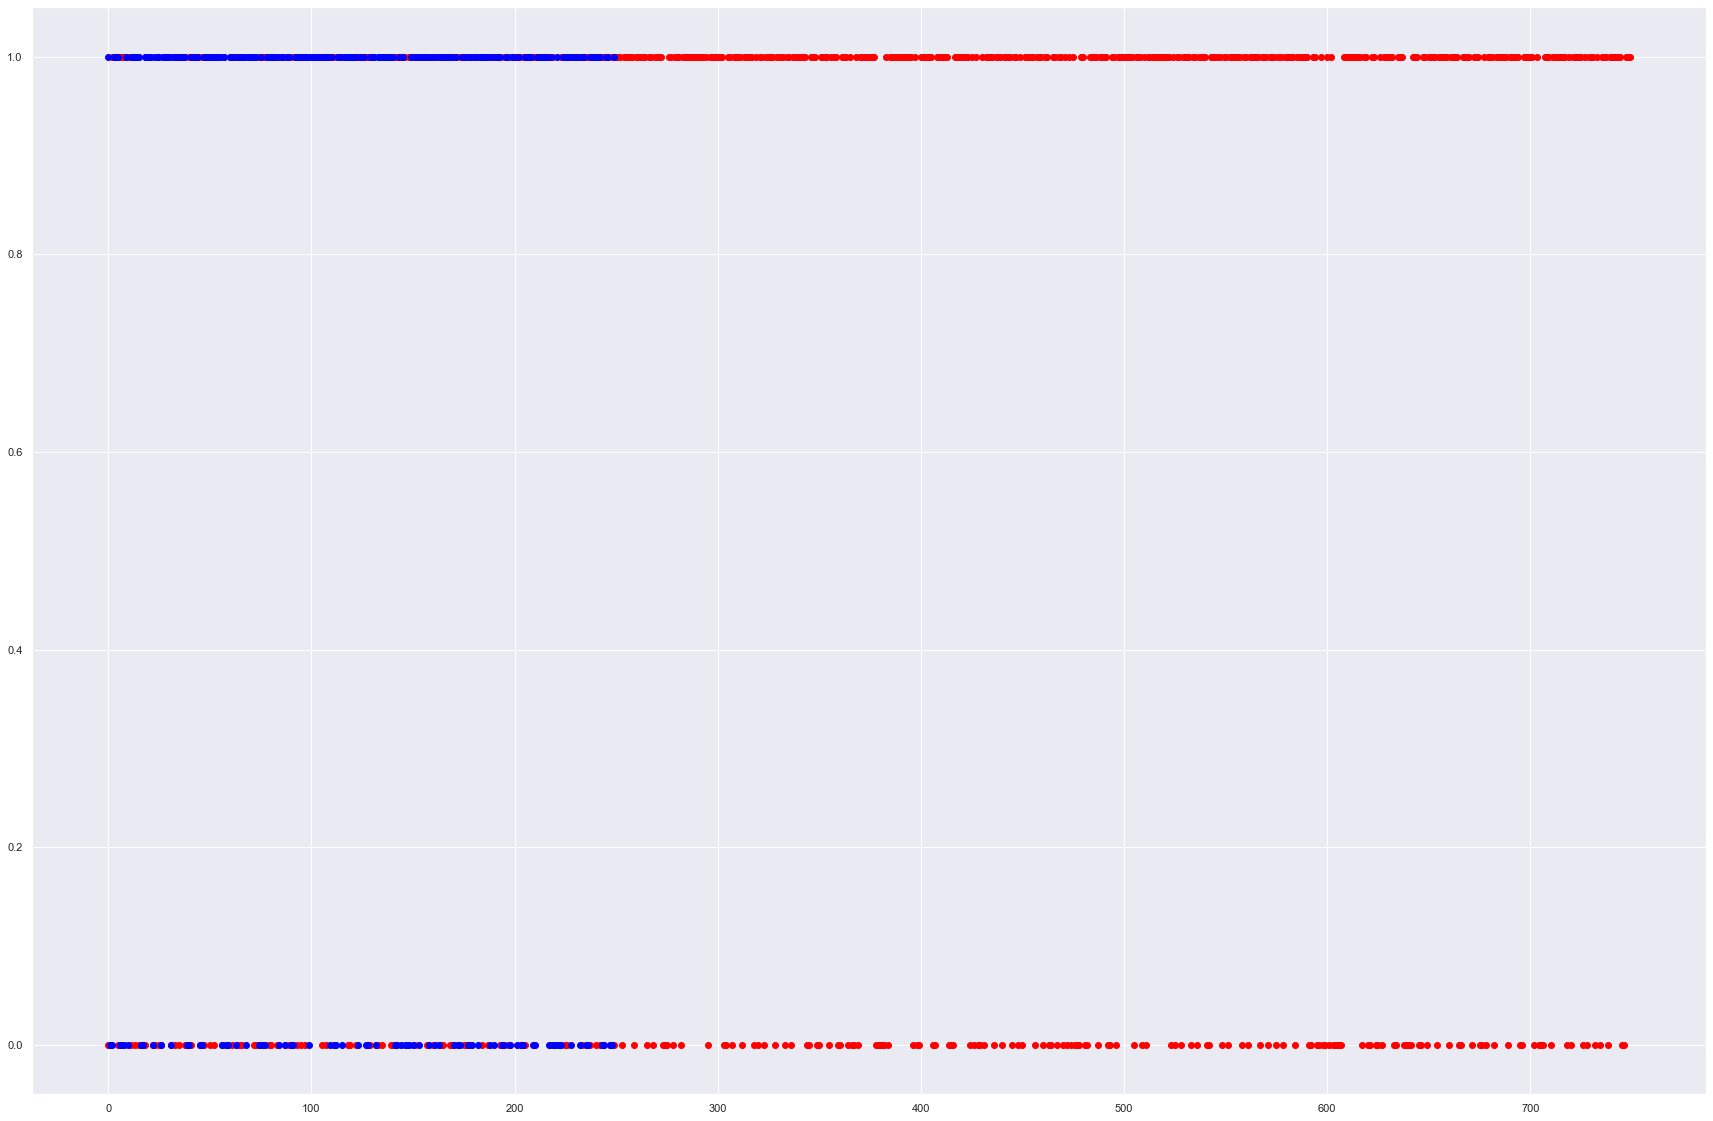

In [202]:
training_samples_index = range(0,len(y_train))
test_samples_index = range(0,len(y_test))

plt.scatter(training_samples_index, tuned_dt_predictions_grid_search_train, color = "red")
plt.scatter(test_samples_index,tuned_dt_predictions_grid_search , color = "blue")
plt.savefig("DECISION TREE")
plt.show()


### Random Forest

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
random_forest = RandomForestClassifier()

In [149]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [150]:
# Getting the predictions for both train and test data
random_forest_predicitons_train = random_forest.predict(X_train)
random_forest_predicitons_test = random_forest.predict(X_test)

In [151]:
print("The random forest accuracy score in training data is : ", accuracy_score(random_forest_predicitons_train, y_train))
print("The random forest accuracy score in test data is : ", accuracy_score(random_forest_predicitons_test, y_test))

The random forest accuracy score in training data is :  1.0
The random forest accuracy score in test data is :  0.828


### Random Forest Hyper Parameter Tuning

In [152]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators" : [10,20,30,40,50,60,70,80,90,100],
            "criterion" : ["gini", "entropy", "log_loss"],
            "max_depth" : [1,2,3,4,5,6,7,8,9,10],
            "max_features": ["sqrt", "log2", None]}

grid_search  = GridSearchCV(estimator = random_forest , param_grid = param_grid)
random_search = RandomizedSearchCV(estimator = random_forest , param_distributions = param_grid)
# grid_search tuning
grid_search.fit(X_train, y_train)
# grid_search tuning
random_search.fit(X_train, y_train)

C:\Users\sneha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1500 fits failed out of a total of 4500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sneha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sneha\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\sneha\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sneha\anaconda3\lib\site-packa

C:\Users\sneha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sneha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sneha\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\sneha\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sneha\anaconda3\lib\site-packages\jobl

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [153]:
random_search.best_params_

{'n_estimators': 10,
 'max_features': 'log2',
 'max_depth': 7,
 'criterion': 'gini'}

In [154]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [155]:
random_forest_grid_search_tuned = RandomForestClassifier(criterion = 'gini',
                                                         max_depth = 10,
                                                         max_features = sqrt,
                                                         n_estimators= 50)

In [156]:
random_forest_random_search_tuned = RandomForestClassifier(criterion = 'gini',
                                                         max_depth = 7,
                                                         max_features = 'log2',
                                                         n_estimators= 10)

In [157]:
random_forest_grid_search_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None,
                       n_estimators=80)

In [158]:
random_forest_random_search_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=10)

In [159]:
rf_tuned_grid_search_pred_train =random_forest_grid_search_tuned.predict(X_train)
rf_tuned_random_search_pred_train =random_forest_random_search_tuned.predict(X_train)

In [160]:
rf_tuned_grid_search_pred =random_forest_grid_search_tuned.predict(X_test)
rf_tuned_random_search_pred =random_forest_grid_search_tuned.predict(X_test)

In [161]:
print("The random forest accuracy score in training data is (RSCV): ", accuracy_score(rf_tuned_random_search_pred_train, y_train))
print("The random forest accuracy score in test data is (RSCV): ", accuracy_score(rf_tuned_random_search_pred, y_test))

The random forest accuracy score in training data is (RSCV):  0.8493333333333334
The random forest accuracy score in test data is (RSCV):  0.824


In [162]:
print("The random forest accuracy score in training data is (GSCV): ", accuracy_score(rf_tuned_grid_search_pred_train, y_train))
print("The random forest accuracy score in test data is : (GSCV)", accuracy_score(rf_tuned_grid_search_pred, y_test))

The random forest accuracy score in training data is (GSCV):  0.988
The random forest accuracy score in test data is : (GSCV) 0.824


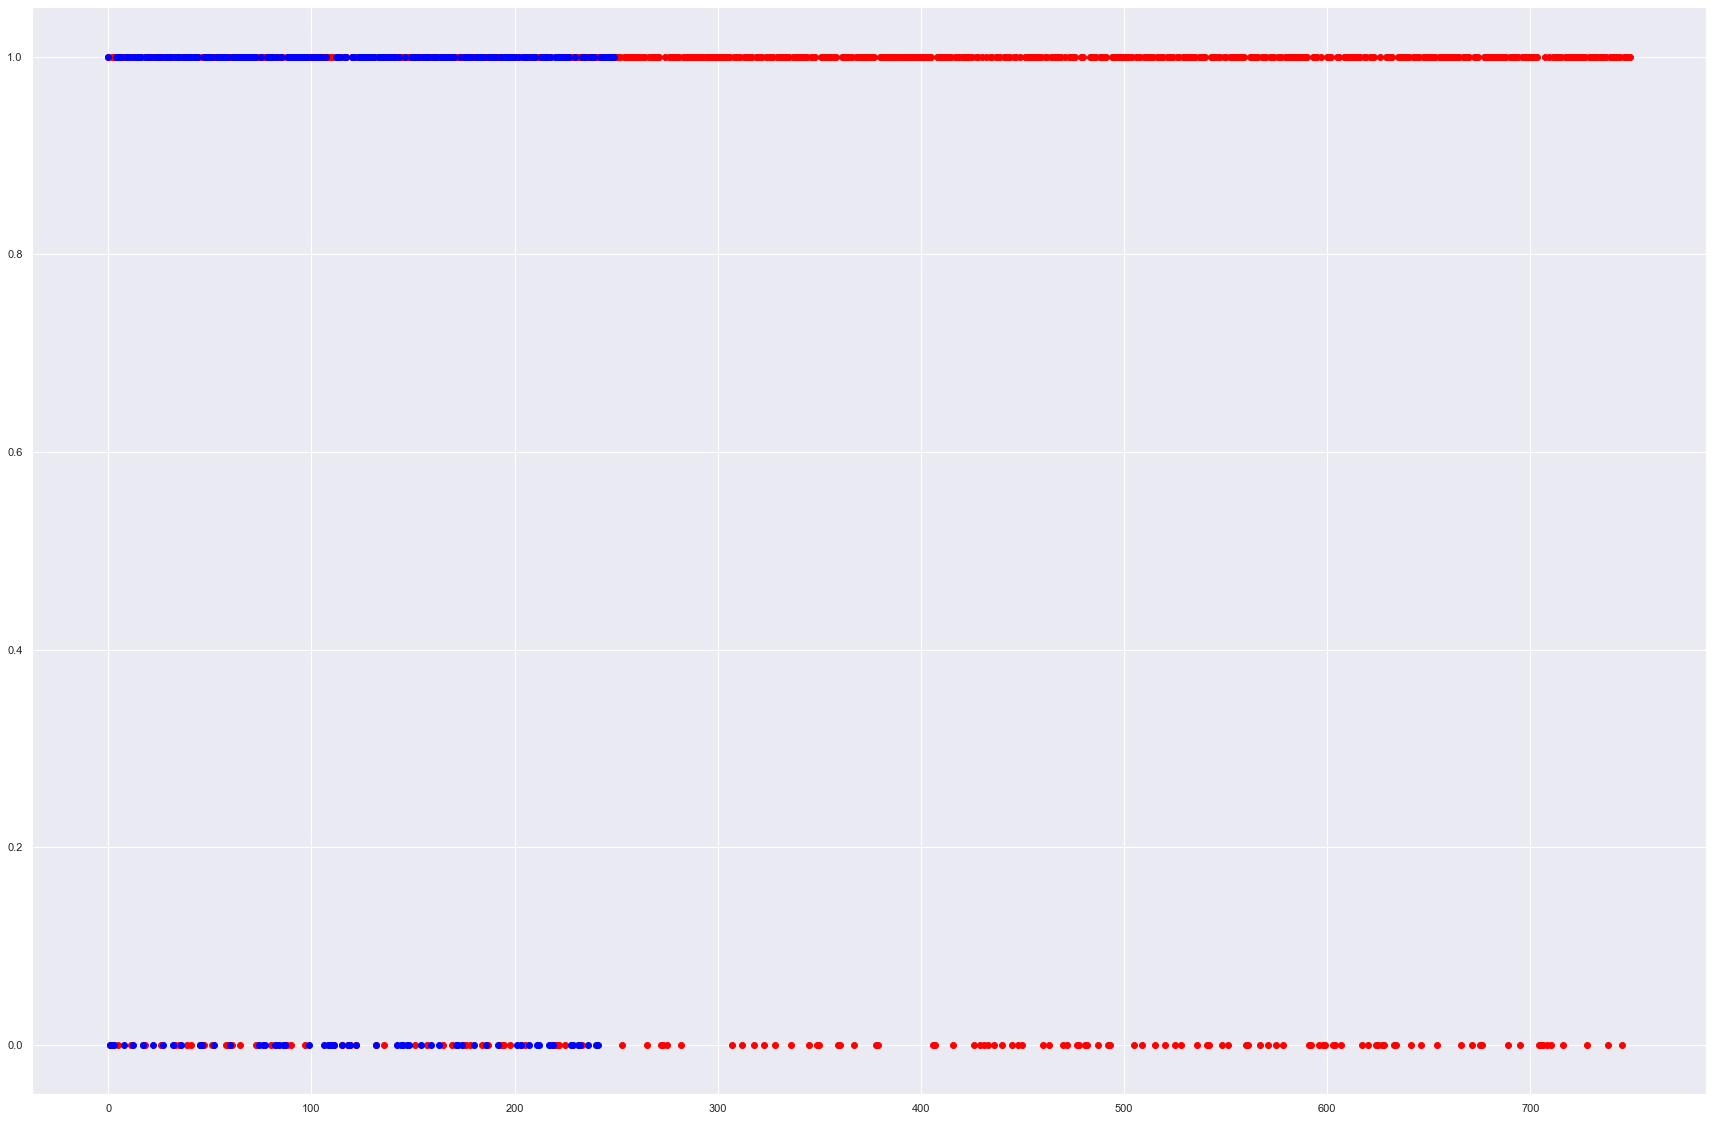

In [203]:
training_samples_index = range(0,len(y_train))
test_samples_index = range(0,len(y_test))

plt.scatter(training_samples_index,rf_tuned_random_search_pred_train , color = "red")
plt.scatter(test_samples_index,rf_tuned_random_search_pred , color = "blue")
plt.savefig("Random Forest")

### XG BOOST, CAT BOOST, GRADIENT BOOST

In [ ]:
!pip install catboost
!pip install xgboost




In [184]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

cat_boost_clf =CatBoostClassifier()
xg_boost_classifier = XGBClassifier()

In [185]:
cat_boost_clf.fit(X_train, y_train)

Learning rate set to 0.009111
0:	learn: 0.6896048	total: 166ms	remaining: 2m 45s
1:	learn: 0.6864280	total: 170ms	remaining: 1m 24s
2:	learn: 0.6834030	total: 178ms	remaining: 59.1s
3:	learn: 0.6805314	total: 184ms	remaining: 45.9s
4:	learn: 0.6774018	total: 190ms	remaining: 37.8s
5:	learn: 0.6737465	total: 196ms	remaining: 32.5s
6:	learn: 0.6714824	total: 200ms	remaining: 28.4s
7:	learn: 0.6686875	total: 207ms	remaining: 25.6s
8:	learn: 0.6657136	total: 213ms	remaining: 23.4s
9:	learn: 0.6626969	total: 218ms	remaining: 21.6s
10:	learn: 0.6598054	total: 225ms	remaining: 20.2s
11:	learn: 0.6568797	total: 230ms	remaining: 18.9s
12:	learn: 0.6548872	total: 234ms	remaining: 17.8s
13:	learn: 0.6519057	total: 237ms	remaining: 16.7s
14:	learn: 0.6492855	total: 239ms	remaining: 15.7s
15:	learn: 0.6464222	total: 242ms	remaining: 14.9s
16:	learn: 0.6438853	total: 245ms	remaining: 14.1s
17:	learn: 0.6415682	total: 250ms	remaining: 13.6s
18:	learn: 0.6388216	total: 255ms	remaining: 13.2s
19:	learn

186:	learn: 0.4509307	total: 1.04s	remaining: 4.53s
187:	learn: 0.4501853	total: 1.04s	remaining: 4.51s
188:	learn: 0.4494895	total: 1.05s	remaining: 4.5s
189:	learn: 0.4489750	total: 1.05s	remaining: 4.49s
190:	learn: 0.4484305	total: 1.06s	remaining: 4.48s
191:	learn: 0.4479347	total: 1.06s	remaining: 4.47s
192:	learn: 0.4474456	total: 1.07s	remaining: 4.47s
193:	learn: 0.4467474	total: 1.07s	remaining: 4.46s
194:	learn: 0.4462657	total: 1.08s	remaining: 4.46s
195:	learn: 0.4457754	total: 1.08s	remaining: 4.45s
196:	learn: 0.4452560	total: 1.09s	remaining: 4.45s
197:	learn: 0.4447634	total: 1.1s	remaining: 4.44s
198:	learn: 0.4442849	total: 1.1s	remaining: 4.43s
199:	learn: 0.4436631	total: 1.11s	remaining: 4.43s
200:	learn: 0.4429954	total: 1.11s	remaining: 4.42s
201:	learn: 0.4424840	total: 1.12s	remaining: 4.42s
202:	learn: 0.4415885	total: 1.12s	remaining: 4.41s
203:	learn: 0.4412122	total: 1.13s	remaining: 4.41s
204:	learn: 0.4408301	total: 1.13s	remaining: 4.4s
205:	learn: 0.44

363:	learn: 0.3713285	total: 1.96s	remaining: 3.42s
364:	learn: 0.3711442	total: 1.96s	remaining: 3.41s
365:	learn: 0.3706290	total: 1.96s	remaining: 3.4s
366:	learn: 0.3702239	total: 1.97s	remaining: 3.39s
367:	learn: 0.3700020	total: 1.97s	remaining: 3.38s
368:	learn: 0.3697203	total: 1.97s	remaining: 3.38s
369:	learn: 0.3694161	total: 1.98s	remaining: 3.37s
370:	learn: 0.3690803	total: 1.98s	remaining: 3.36s
371:	learn: 0.3686442	total: 1.99s	remaining: 3.36s
372:	learn: 0.3681270	total: 1.99s	remaining: 3.35s
373:	learn: 0.3678572	total: 2s	remaining: 3.34s
374:	learn: 0.3674445	total: 2s	remaining: 3.34s
375:	learn: 0.3670370	total: 2.01s	remaining: 3.33s
376:	learn: 0.3667950	total: 2.01s	remaining: 3.33s
377:	learn: 0.3664876	total: 2.02s	remaining: 3.32s
378:	learn: 0.3662233	total: 2.02s	remaining: 3.32s
379:	learn: 0.3658768	total: 2.03s	remaining: 3.31s
380:	learn: 0.3655508	total: 2.04s	remaining: 3.31s
381:	learn: 0.3652759	total: 2.04s	remaining: 3.3s
382:	learn: 0.364999

529:	learn: 0.3190070	total: 2.83s	remaining: 2.51s
530:	learn: 0.3186560	total: 2.83s	remaining: 2.5s
531:	learn: 0.3184093	total: 2.84s	remaining: 2.5s
532:	learn: 0.3180676	total: 2.84s	remaining: 2.49s
533:	learn: 0.3178230	total: 2.85s	remaining: 2.48s
534:	learn: 0.3174057	total: 2.85s	remaining: 2.48s
535:	learn: 0.3169613	total: 2.85s	remaining: 2.47s
536:	learn: 0.3166490	total: 2.86s	remaining: 2.47s
537:	learn: 0.3164212	total: 2.87s	remaining: 2.46s
538:	learn: 0.3161312	total: 2.87s	remaining: 2.46s
539:	learn: 0.3159449	total: 2.88s	remaining: 2.45s
540:	learn: 0.3157334	total: 2.88s	remaining: 2.44s
541:	learn: 0.3153857	total: 2.89s	remaining: 2.44s
542:	learn: 0.3151170	total: 2.89s	remaining: 2.43s
543:	learn: 0.3148167	total: 2.9s	remaining: 2.43s
544:	learn: 0.3145111	total: 2.9s	remaining: 2.42s
545:	learn: 0.3141637	total: 2.91s	remaining: 2.42s
546:	learn: 0.3139096	total: 2.91s	remaining: 2.41s
547:	learn: 0.3136401	total: 2.92s	remaining: 2.41s
548:	learn: 0.31

720:	learn: 0.2701008	total: 3.84s	remaining: 1.49s
721:	learn: 0.2697793	total: 3.84s	remaining: 1.48s
722:	learn: 0.2695569	total: 3.85s	remaining: 1.47s
723:	learn: 0.2694147	total: 3.85s	remaining: 1.47s
724:	learn: 0.2692011	total: 3.86s	remaining: 1.46s
725:	learn: 0.2689769	total: 3.86s	remaining: 1.46s
726:	learn: 0.2687075	total: 3.87s	remaining: 1.45s
727:	learn: 0.2685115	total: 3.87s	remaining: 1.45s
728:	learn: 0.2683739	total: 3.88s	remaining: 1.44s
729:	learn: 0.2679551	total: 3.88s	remaining: 1.44s
730:	learn: 0.2676807	total: 3.89s	remaining: 1.43s
731:	learn: 0.2672387	total: 3.9s	remaining: 1.43s
732:	learn: 0.2669936	total: 3.9s	remaining: 1.42s
733:	learn: 0.2667036	total: 3.9s	remaining: 1.42s
734:	learn: 0.2665108	total: 3.91s	remaining: 1.41s
735:	learn: 0.2662130	total: 3.92s	remaining: 1.4s
736:	learn: 0.2660647	total: 3.92s	remaining: 1.4s
737:	learn: 0.2659224	total: 3.93s	remaining: 1.39s
738:	learn: 0.2655795	total: 3.93s	remaining: 1.39s
739:	learn: 0.265

894:	learn: 0.2300522	total: 4.75s	remaining: 557ms
895:	learn: 0.2298554	total: 4.75s	remaining: 552ms
896:	learn: 0.2296855	total: 4.76s	remaining: 546ms
897:	learn: 0.2294801	total: 4.76s	remaining: 541ms
898:	learn: 0.2292980	total: 4.76s	remaining: 535ms
899:	learn: 0.2290606	total: 4.77s	remaining: 530ms
900:	learn: 0.2288735	total: 4.78s	remaining: 525ms
901:	learn: 0.2287119	total: 4.78s	remaining: 520ms
902:	learn: 0.2285081	total: 4.79s	remaining: 514ms
903:	learn: 0.2283426	total: 4.79s	remaining: 509ms
904:	learn: 0.2281474	total: 4.8s	remaining: 504ms
905:	learn: 0.2279875	total: 4.8s	remaining: 498ms
906:	learn: 0.2277964	total: 4.81s	remaining: 493ms
907:	learn: 0.2275226	total: 4.81s	remaining: 488ms
908:	learn: 0.2273536	total: 4.82s	remaining: 482ms
909:	learn: 0.2271859	total: 4.82s	remaining: 477ms
910:	learn: 0.2268446	total: 4.83s	remaining: 472ms
911:	learn: 0.2267104	total: 4.83s	remaining: 467ms
912:	learn: 0.2265468	total: 4.84s	remaining: 461ms
913:	learn: 0.

In [186]:
xg_boost_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [187]:
catboost_predictions = cat_boost_clf.predict(X_test)

In [188]:
xg_boost_classifier_predictions = xg_boost_classifier.predict(X_test)

In [189]:
print("The accuracy score for xg_boost_classifier is :", accuracy_score(xg_boost_classifier.predict(X_train), y_train))
print("The accuracy score for catboost_predictions is :", accuracy_score(cat_boost_clf.predict(X_train), y_train))

The accuracy score for xg_boost_classifier is : 1.0
The accuracy score for catboost_predictions is : 0.968


In [190]:
print("The accuracy score for xg_boost_classifier is :", accuracy_score(xg_boost_classifier_predictions, y_test))
print("The accuracy score for catboost_predictions is :", accuracy_score(catboost_predictions, y_test))

The accuracy score for xg_boost_classifier is : 0.788
The accuracy score for catboost_predictions is : 0.824


In [191]:
from sklearn.ensemble import GradientBoostingClassifier

In [192]:
gradient_boost_classifier = GradientBoostingClassifier()

In [193]:
gradient_boost_classifier.fit(X_train,y_train)

GradientBoostingClassifier()

In [194]:
gradient_boost_predictions = gradient_boost_classifier.predict(X_test)

In [195]:
print("The Training accuracy score for gradient_boost_classifier is :", accuracy_score(gradient_boost_classifier.predict(X_train), y_train))

The Training accuracy score for gradient_boost_classifier is : 0.8946666666666667


In [196]:
print("The accuracy score for gradient_boost_classifier is :", accuracy_score(gradient_boost_predictions, y_test))

The accuracy score for gradient_boost_classifier is : 0.836


##### Results

In [2]:
import pandas as pd

In [3]:
Model_Result = {"Models":['Logistic Regression','KNN','SVC','Decision Tree','Random Forest','Cat Boost','XG Boost','Gradient Boost'],"Training Accuracy":[71.6,71.3,70.53,100,84.9,96.8,100,83.6],"Testing Accuracy":[75.2,70.8,72.8,70.4,82.4,82.4,78.8,87.4]}

Final_Model_Results = pd.DataFrame(Model_Result)

Final_Model_Results

,Models,Training Accuracy,Testing Accuracy
0,Logistic Regression,71.60,75.2
1,KNN,71.30,70.8
2,SVC,70.53,72.8
3,Decision Tree,100.00,70.4
4,Random Forest,84.90,82.4
5,Cat Boost,96.80,82.4
6,XG Boost,100.00,78.8
7,Gradient Boost,83.60,87.4


### The Best Model for Prediction is Random Forest Random Search CV

## CONCLUSION

### We can see that number of people in class good is 700 and in class bad is 300

* Generally for all the checking status customers who are not risky for credit are more than number of risky customers but most of those who have no checking as checking status are very less risky customer and have class good and credit can be granted to them without any second thought.

* Most of the customers having credit history as existing paid are not risky for credit. Same is the case for critical/other existing credit. In customers who have credit history as no credits/all paid & all paid there are more number of customers who are in bad class, hence they are risky but a small credit can be given to them because they will pay back the money later and that credit will not go in NPA because they are in class of no credits or all paid which clearly shows they return the money but not in time

* Most of the customers who take credit for radio,TV,furniture,new car and retraining generally pay of the loan and they are not risky customers.

* Customers who are having savings_status between 500 to 1000 are generally very less risky customers

* Customers who are employed between 1 and 4 are generally less risky. Same is the case for employment greater than 7

* Most of the customers who are having installment commitment of 4 are less risky

* Customers who are residing for a longer period of time are less risky.

* Customers who own the house are generally less risky as compared to those who does not posses a property

* Customer who posses car and also investment in real estate are less risky

* Individual loan account customers are less risky than loan accounts where co-applicant and guarantor are involved

* Customers who have existing credit of less than 3 are more risky to customers who have more existing credits

* Customers who are skilled are less risky compared to others

* Customers whose age is between 25 to 45 are who are need of credit. Customers who are above 40 years of age are very less risky compared to other age groups.

* Customers where duration of credit is less are less risky. And as the duration of credit increases the risk of the customer also increases.

* Customers who take credit more than 3500 are very risky compared to customers who take less credit amount.



* Almost 40% people have checking_status as no checking, which means there will be no account checking for them if they are   availing for credit. 27.5% people have less than 0 in their account checking. 27% have between 0 to 200 and only 6% people heve more than 200 in their account checking.

* People who are existing paid or critical/another existing credit are more prone towards credit.

* People are taking more credit for purchasing Radio,TV,New Car,Furnitures and equipments.

* Customers who have less savings are more prone towards credit as they dont have liquidity.

* Customers who have more tenure of employment are more prone towards credit which shows they need more money.

* Almost 50% customers have installment commitment of 4

* Male single are in need of more credit which is surprising as bachelor male have less expenses.

* In more than 90% cases there is no involvement of other parties in loan cases.

* Customers who have more tenure of residence are more prone towards credit.

* Customers who are in possession of Car and Real Estate are more prone towards credit

* Customers who are owning house are more inclined towards credit

* Maximum customers are having only one existing loan credit

* 70% customers have good credit and 30% have bad credit



* The duration for most of the loans are between 10 and 25

* The maximum customers have taken credit between 1000 to 5000

* Customers between age of 20 and 30 are more in a need of credit




